In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/cleaning_data_phase2.csv.zip')

In [3]:
columns = [c.lower() for c in ['_MICHD', '_SEX', 'GENHLTH', 'PHYSHLTH', 
               'MENTHLTH', 'ADDEPEV3', 'CHECKUP1', 
               '_TOTINDA', '_RFHYPE6', 'CHOLMED3', '_RFCHOL3', 
               'CVDSTRK3', '_ASTHMS1', 'CHCSCNCR', 'CHCOCNCR']]

In [4]:
df_ran = df[columns]

In [5]:
df_ran.head()

,_michd,_sex,genhlth,physhlth,menthlth,addepev3,checkup1,_totinda,_rfhype6,cholmed3,_rfchol3,cvdstrk3,_asthms1,chcscncr,chcocncr
0,No,Female,Poor,20.0,10.0,No,Within past 2 years (1 year but < 2 years ago),No physical activity or exercise in last 30 days,No,Yes,Yes,No,Current,No,No
1,Yes,Female,Good,0.0,0.0,No,Within past year (anytime < 12 months ago),Had physical activity or exercise,Yes,Yes,Yes,No,Never,No,No
2,Yes,Female,Very good,0.0,0.0,No,Within past year (anytime < 12 months ago),No physical activity or exercise in last 30 days,Yes,No,No,No,Never,No,No
3,No,Female,Very good,0.0,10.0,No,Within past year (anytime < 12 months ago),Had physical activity or exercise,Yes,No,Yes,No,Never,No,No
4,Yes,Male,Poor,30.0,0.0,No,Within past year (anytime < 12 months ago),Had physical activity or exercise,No,Yes,Yes,Yes,Never,No,No


In [6]:
df_ran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414511 entries, 0 to 414510
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   _michd    414511 non-null  object 
 1   _sex      414511 non-null  object 
 2   genhlth   414511 non-null  object 
 3   physhlth  406020 non-null  float64
 4   menthlth  407427 non-null  float64
 5   addepev3  414511 non-null  object 
 6   checkup1  414511 non-null  object 
 7   _totinda  414511 non-null  object 
 8   _rfhype6  414511 non-null  object 
 9   cholmed3  414511 non-null  object 
 10  _rfchol3  414511 non-null  object 
 11  cvdstrk3  414511 non-null  object 
 12  _asthms1  414511 non-null  object 
 13  chcscncr  414511 non-null  object 
 14  chcocncr  414511 non-null  object 
dtypes: float64(2), object(13)
memory usage: 47.4+ MB


In [7]:
df_ran.isnull().sum()

_michd         0
_sex           0
genhlth        0
physhlth    8491
menthlth    7084
addepev3       0
checkup1       0
_totinda       0
_rfhype6       0
cholmed3       0
_rfchol3       0
cvdstrk3       0
_asthms1       0
chcscncr       0
chcocncr       0
dtype: int64

In [8]:
target_columns_description = {
    '_michd': 'Heart Disease'
}

In [9]:
cat_columns_description = {
    '_sex': 'Sex',
    'genhlth': 'General Helath Status',
    'addepev3': 'Depressive Disorder',
    'checkup1': 'General Physical Exam',
    '_totinda': 'Physical Activity',
    '_rfhype6': 'High Blood Pressure',
    'cholmed3': 'Currently Taking Medicine For High Cholesterol',
    '_rfchol3': 'High Cholesterol',
    'cvdstrk3': 'Stroke',
    '_asthms1': 'Asthma Status',
    'chcscncr': 'Skin Cancer',
    'chcocncr': 'Other Cancer'
}

In [10]:
num_columns_description = {
    'physhlth': 'Number of Days Physical Health Not Good',
    'menthlth': 'Number of Days Mental Health not Good'
}

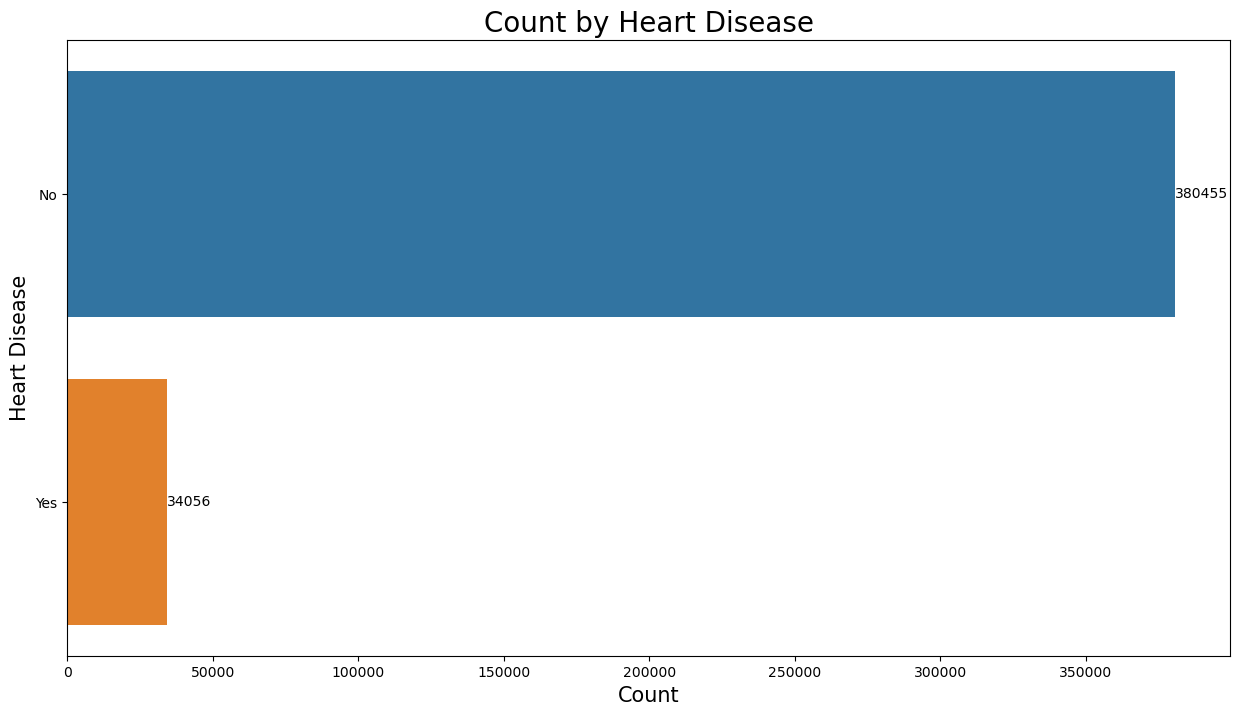

In [11]:
# Create barchart of counts for heart disease
plt.figure(figsize = (15, 8))
ax = sns.barplot(y = df_ran['_michd'].value_counts().index, x = df_ran['_michd'].value_counts().values)
ax.bar_label(ax.containers[0])
plt.title(f'Count by Heart Disease', size = 20)
plt.xlabel('Count', size = 15)
plt.ylabel(f'Heart Disease', size = 15);

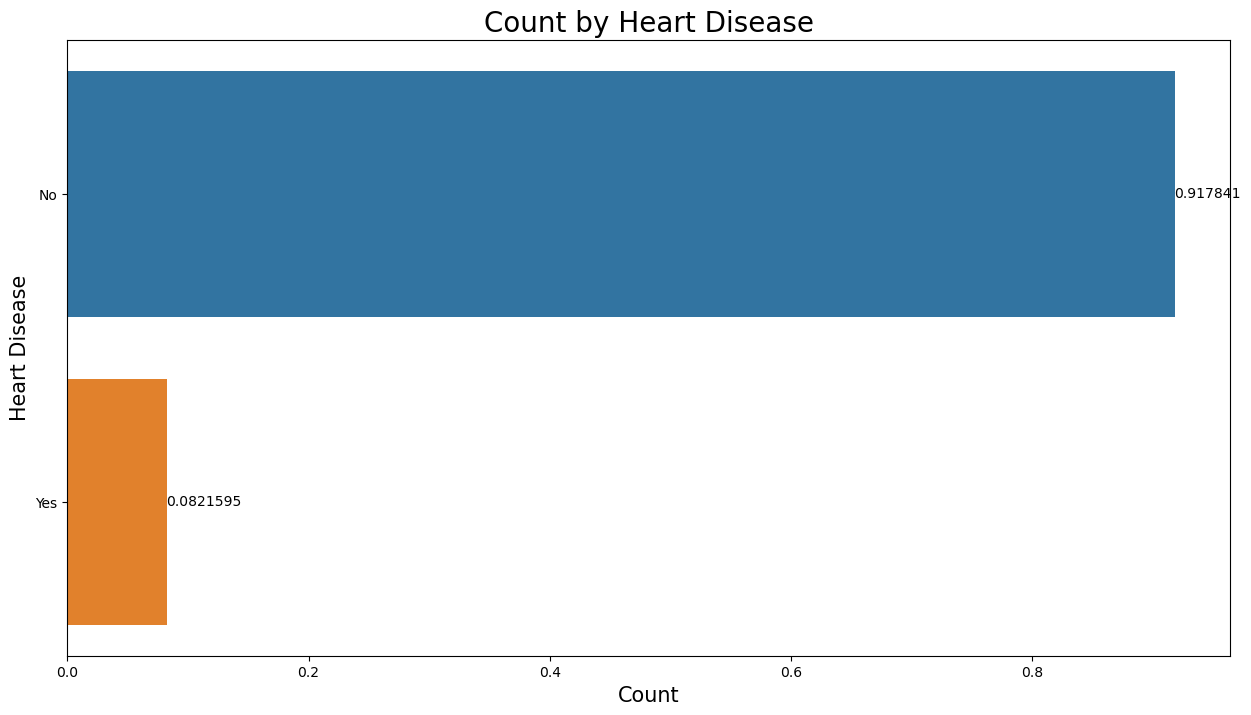

In [12]:
# Create barchart of counts for heart disease
plt.figure(figsize = (15, 8))
ax = sns.barplot(y = df_ran['_michd'].value_counts(normalize=True).index, x = df_ran['_michd'].value_counts(normalize=True).values)
ax.bar_label(ax.containers[0])
plt.title(f'Count by Heart Disease', size = 20)
plt.xlabel('Count', size = 15)
plt.ylabel(f'Heart Disease', size = 15);

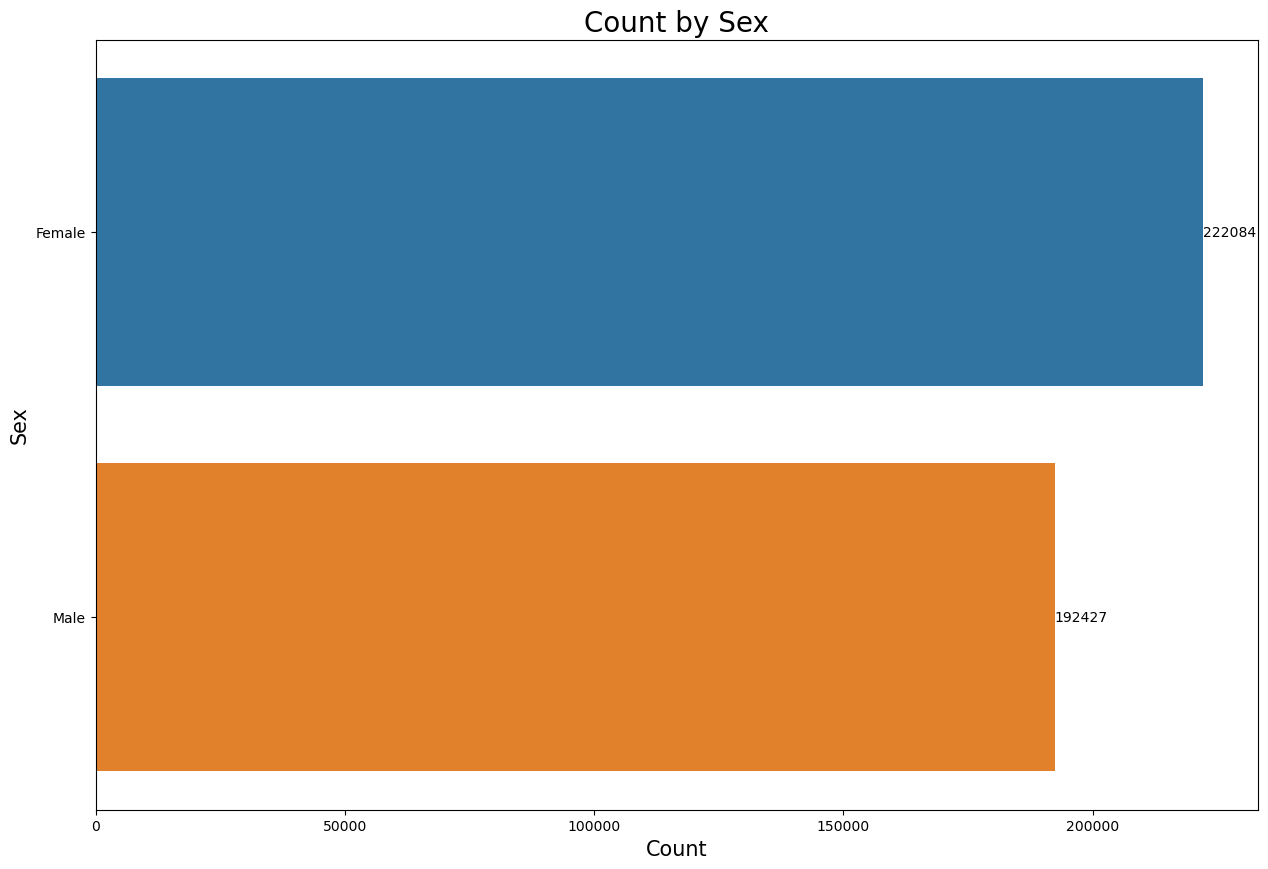

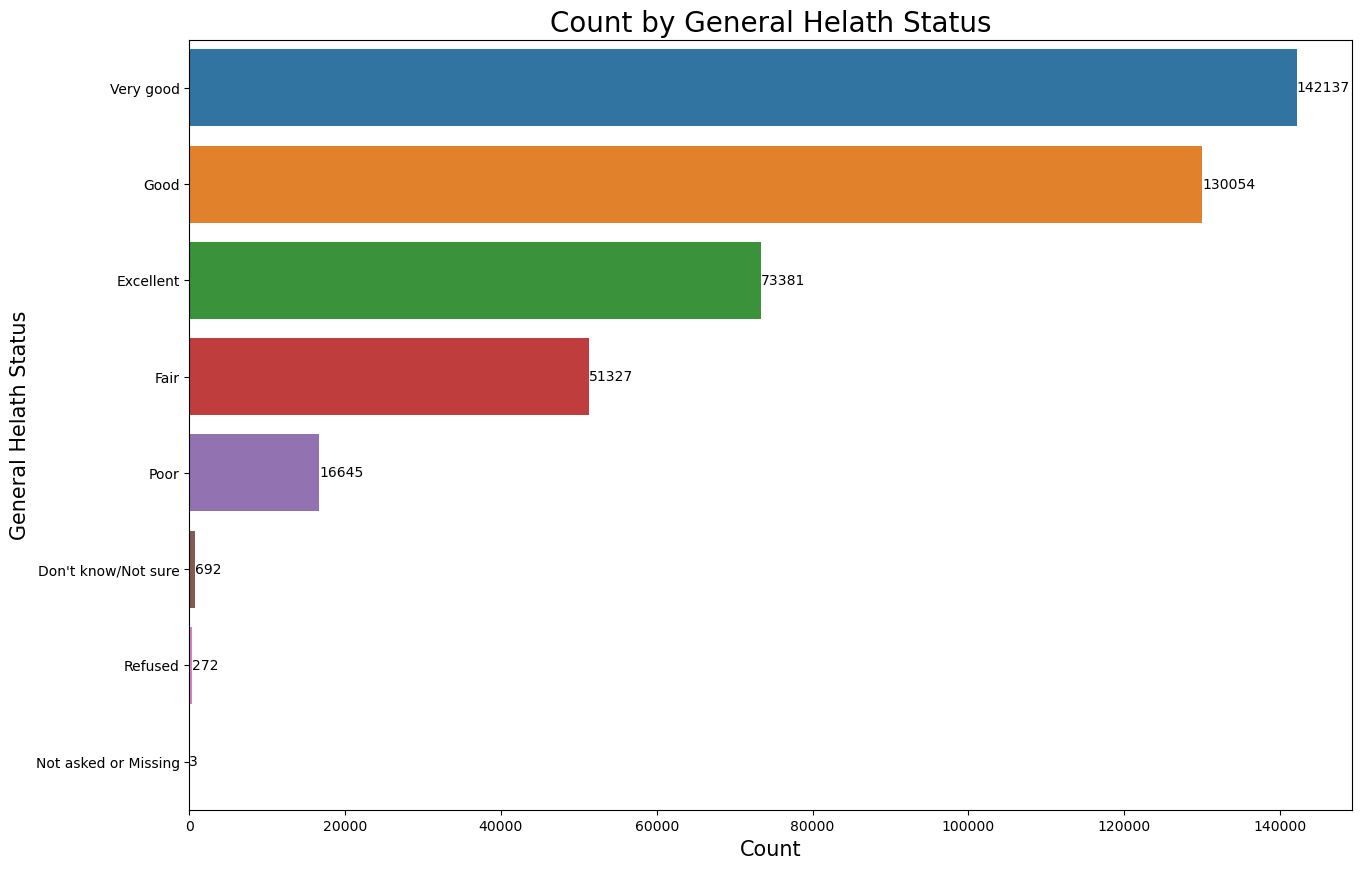

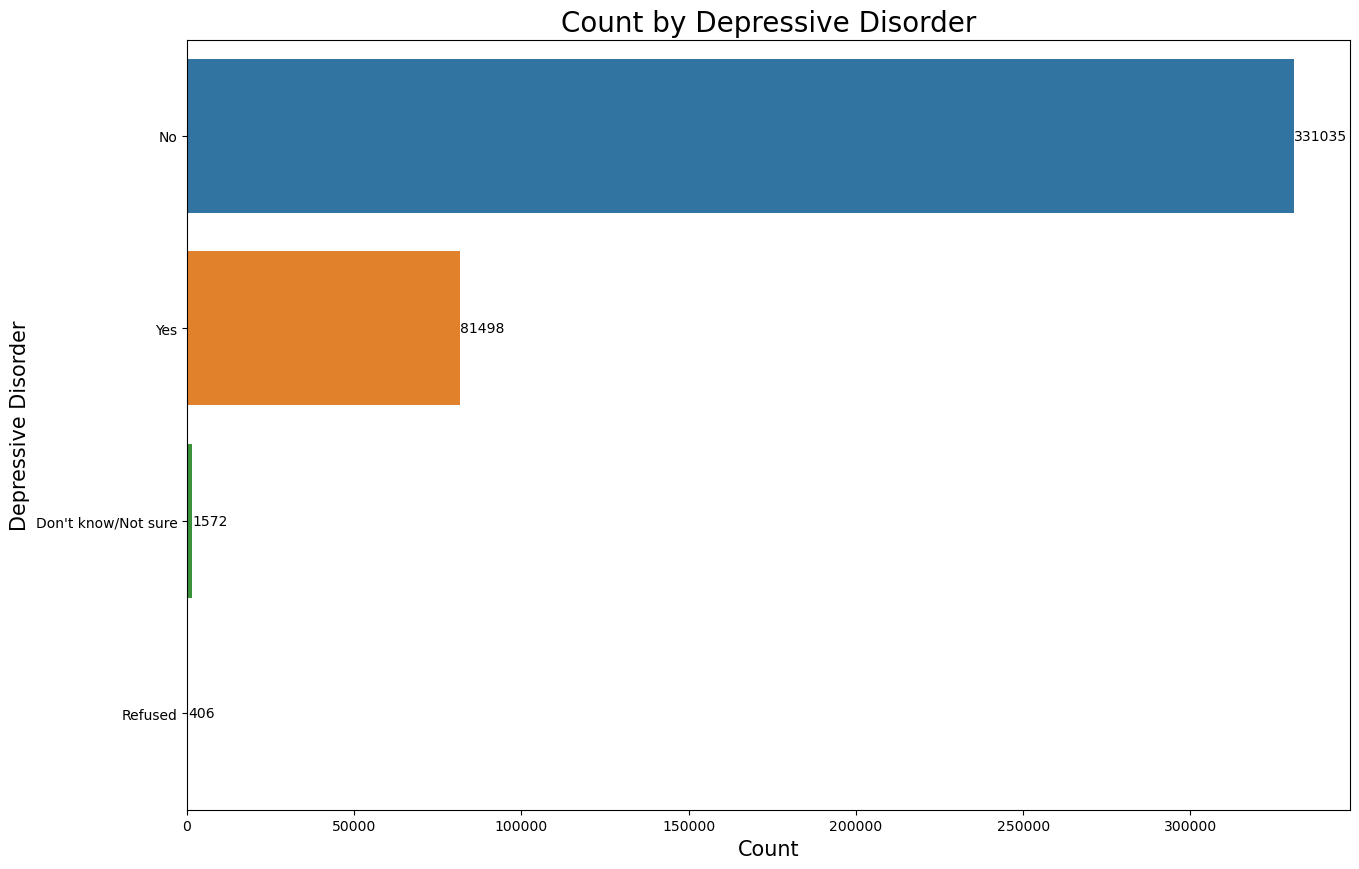

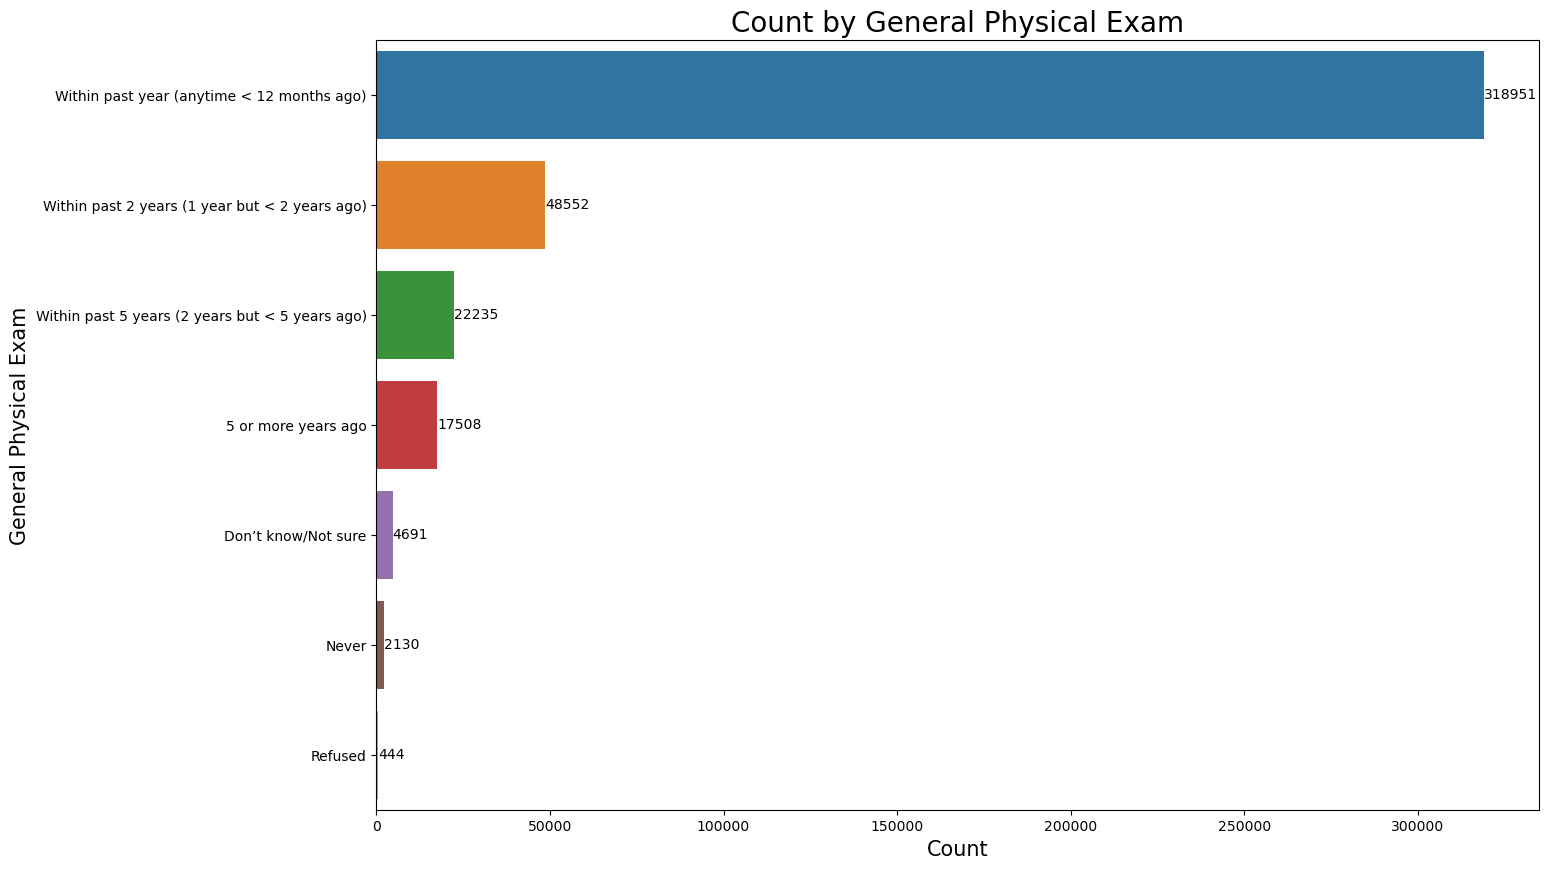

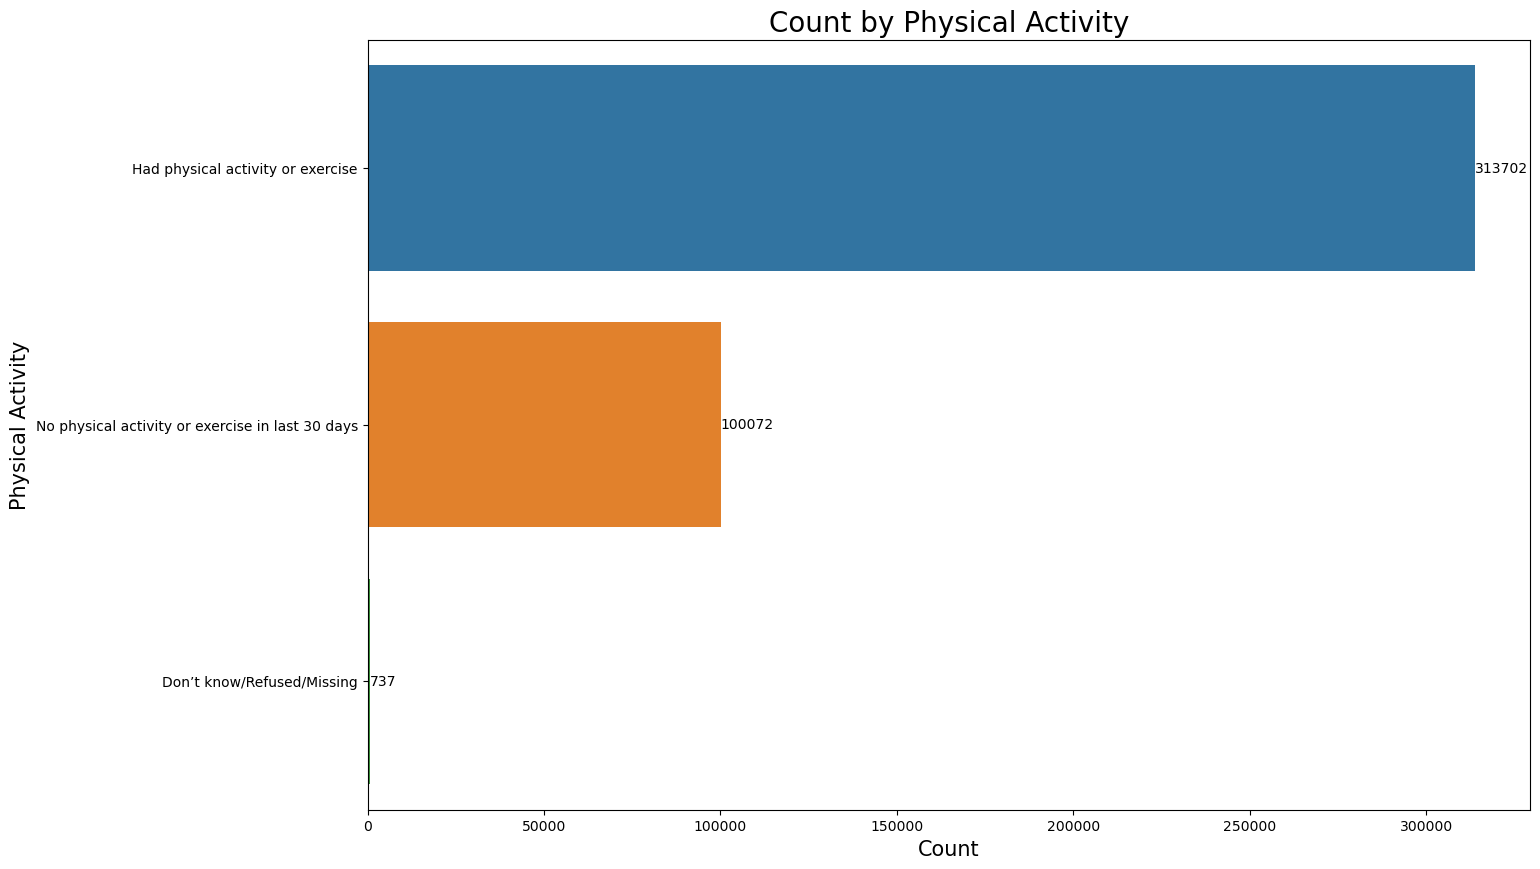

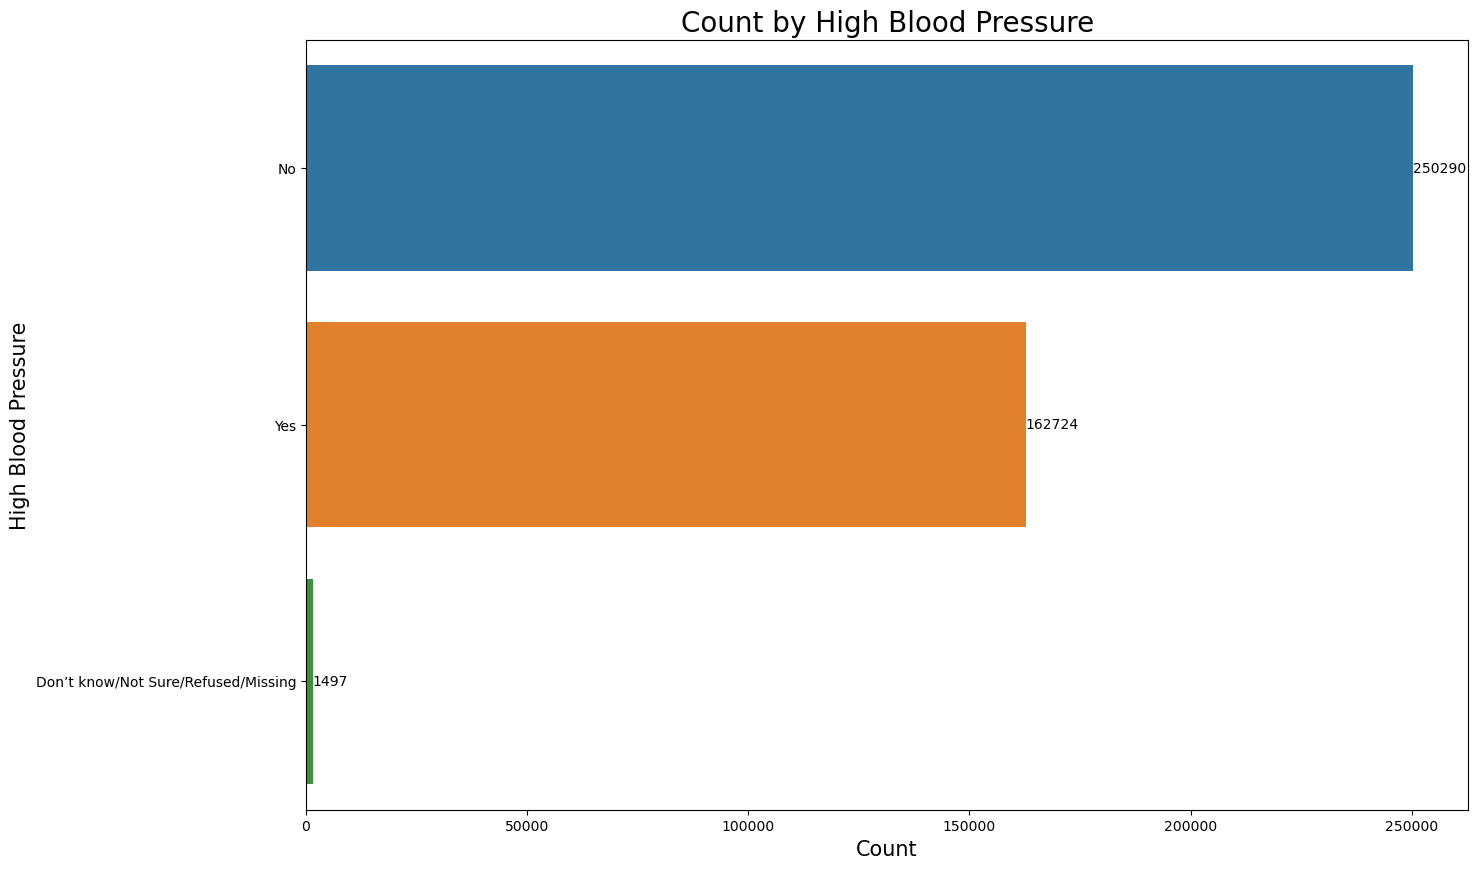

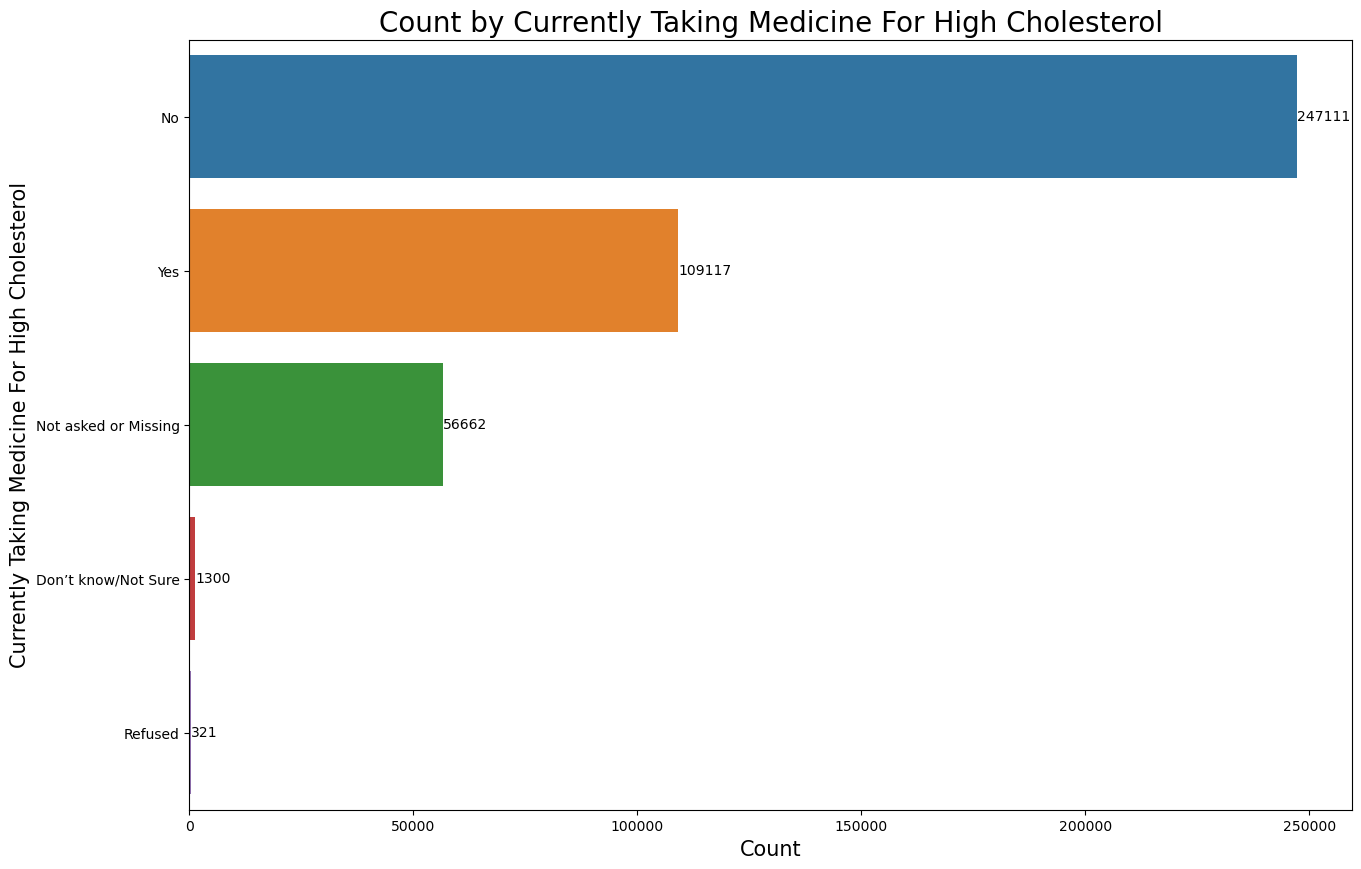

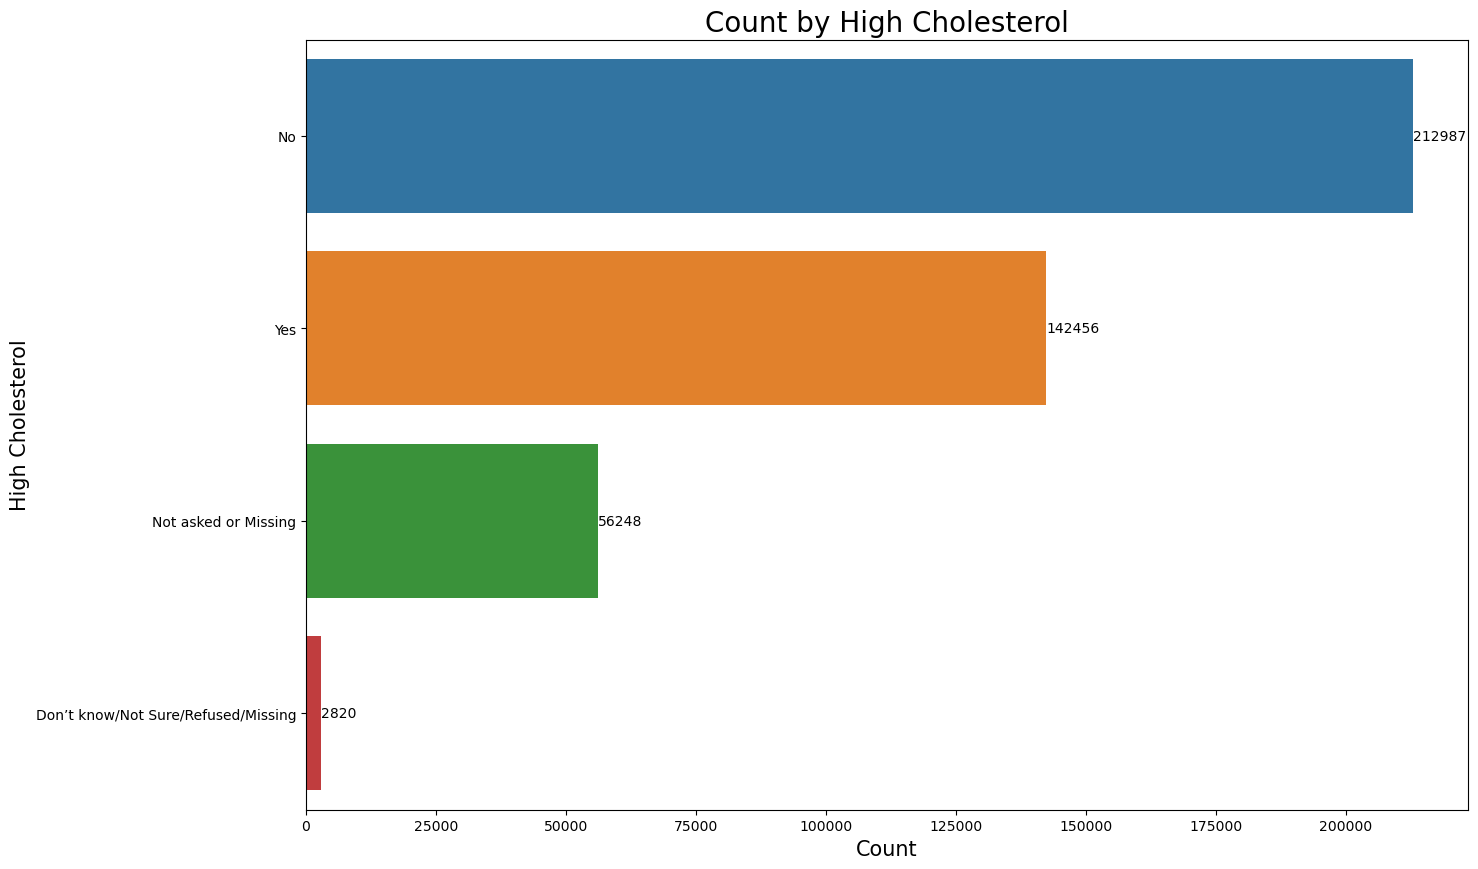

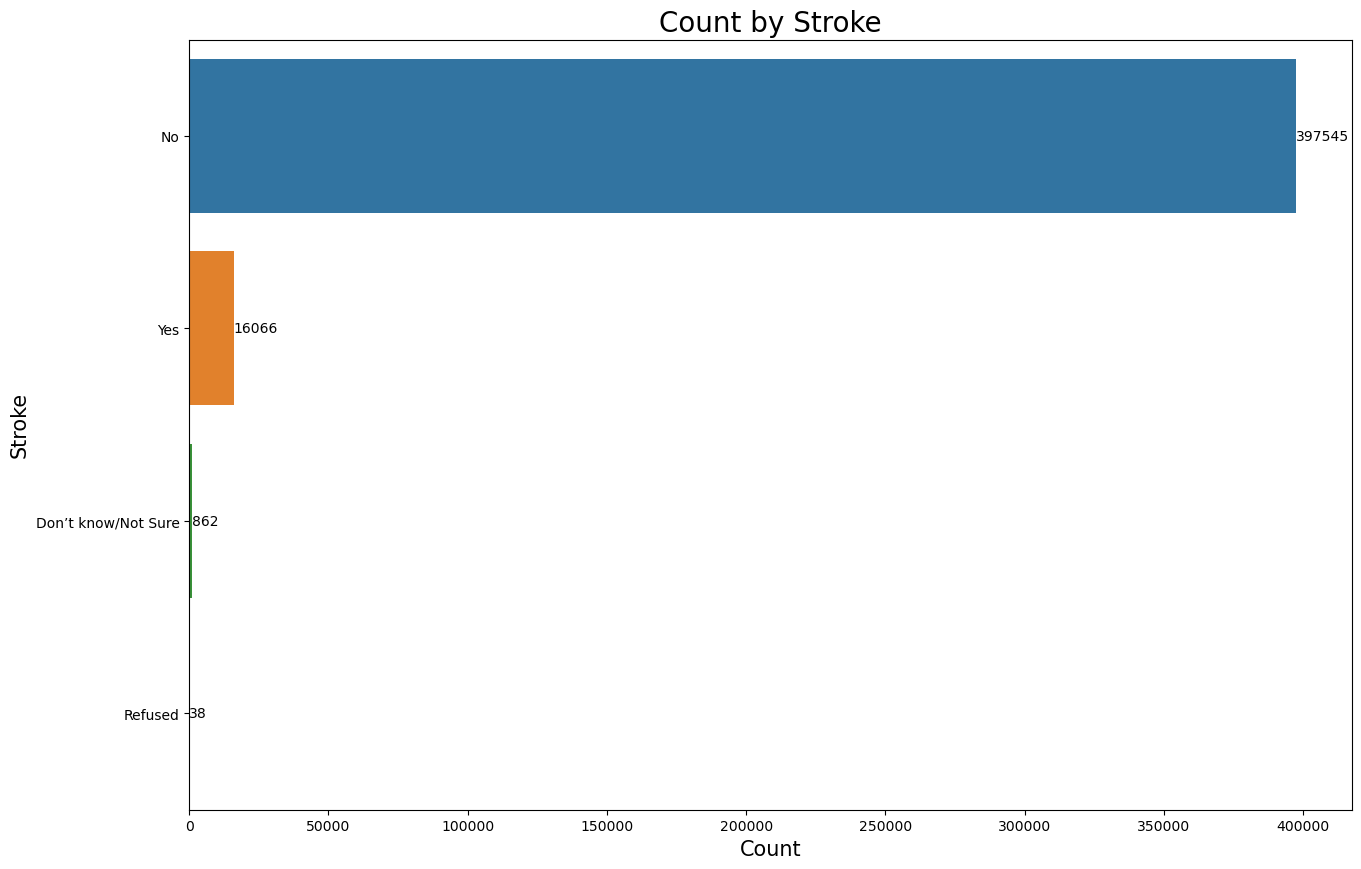

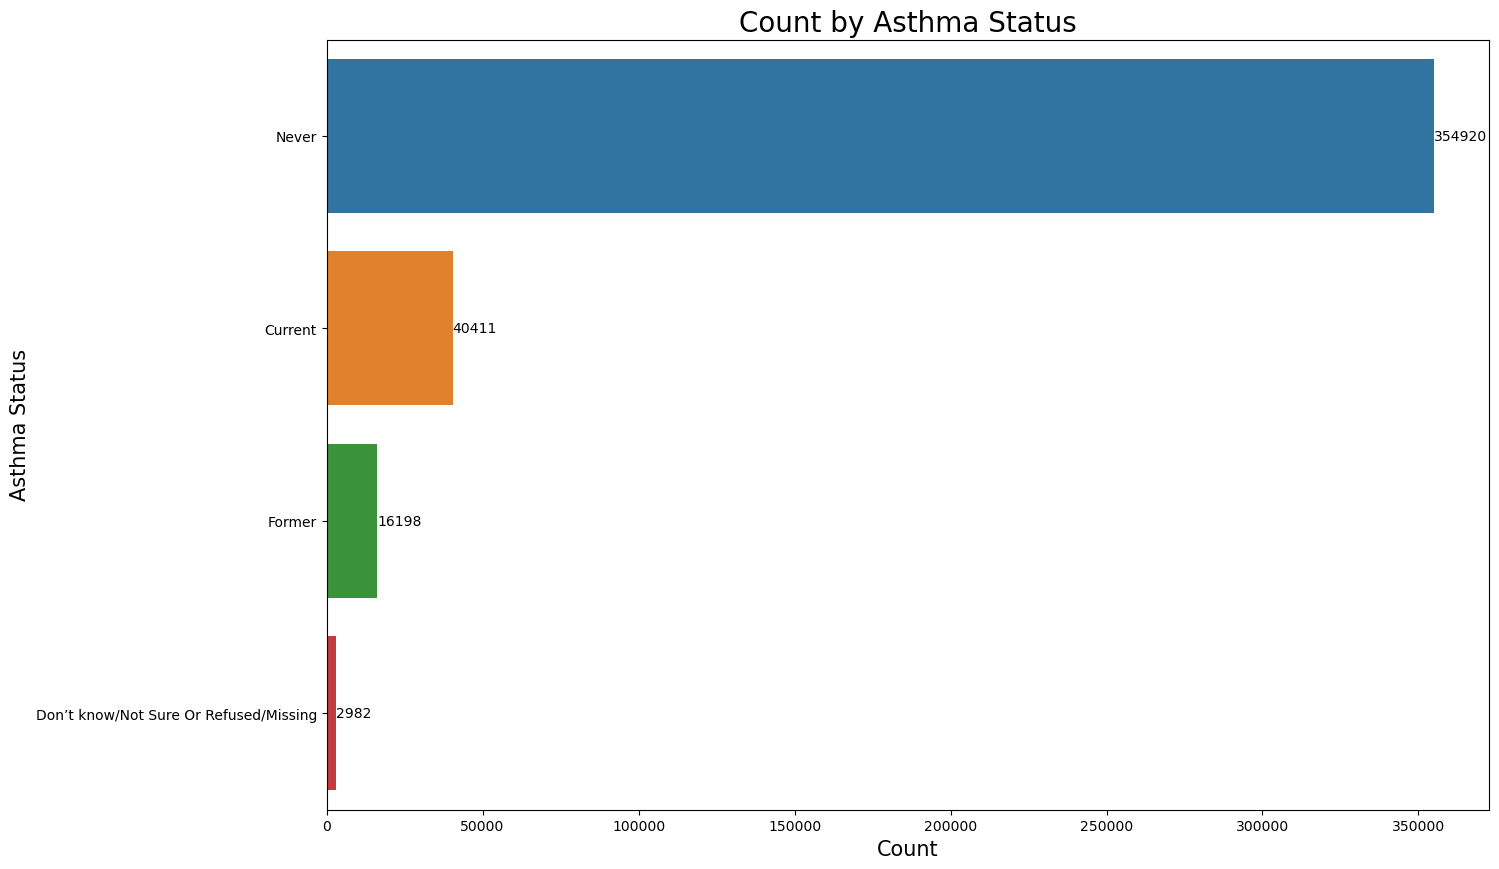

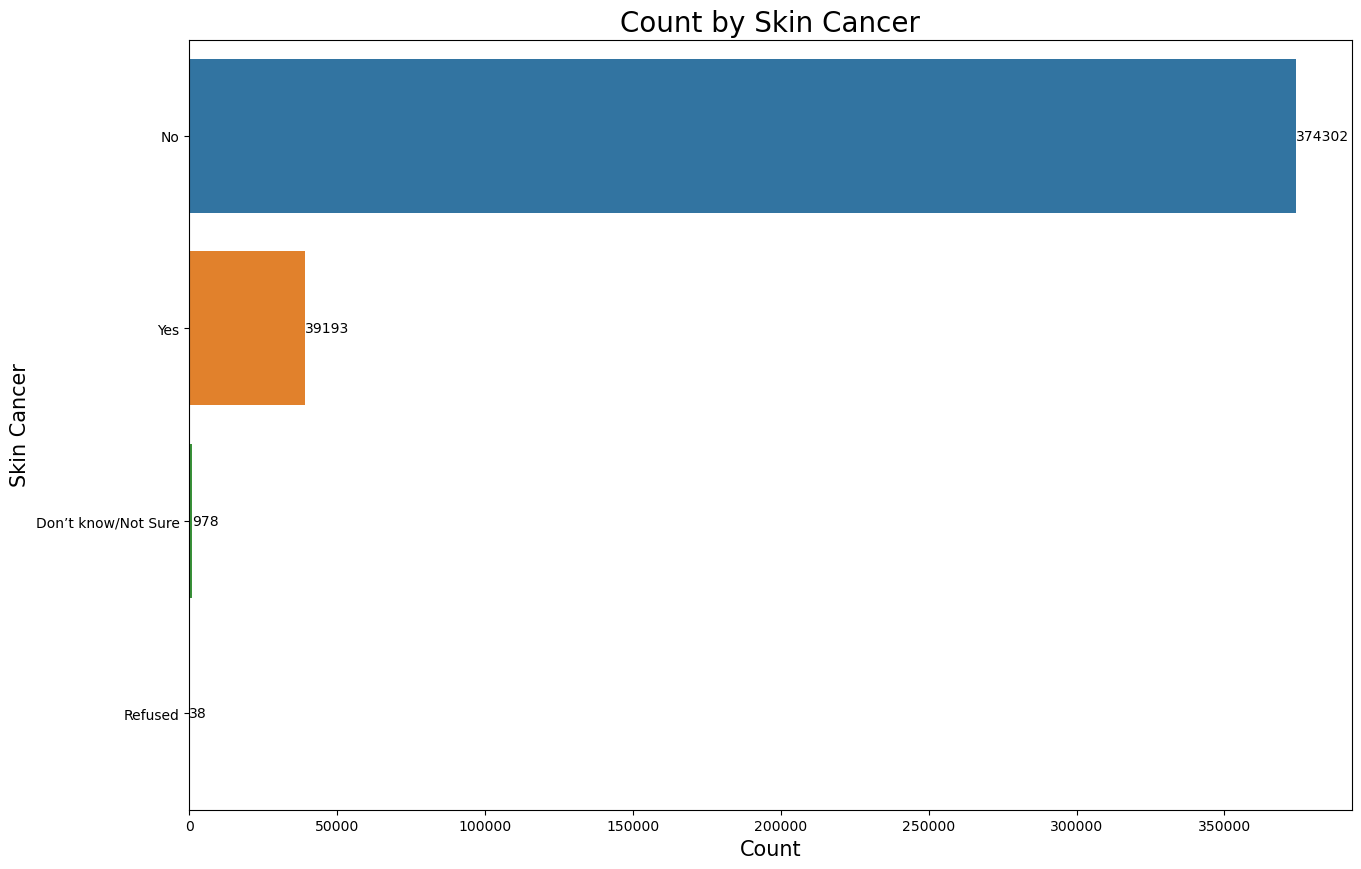

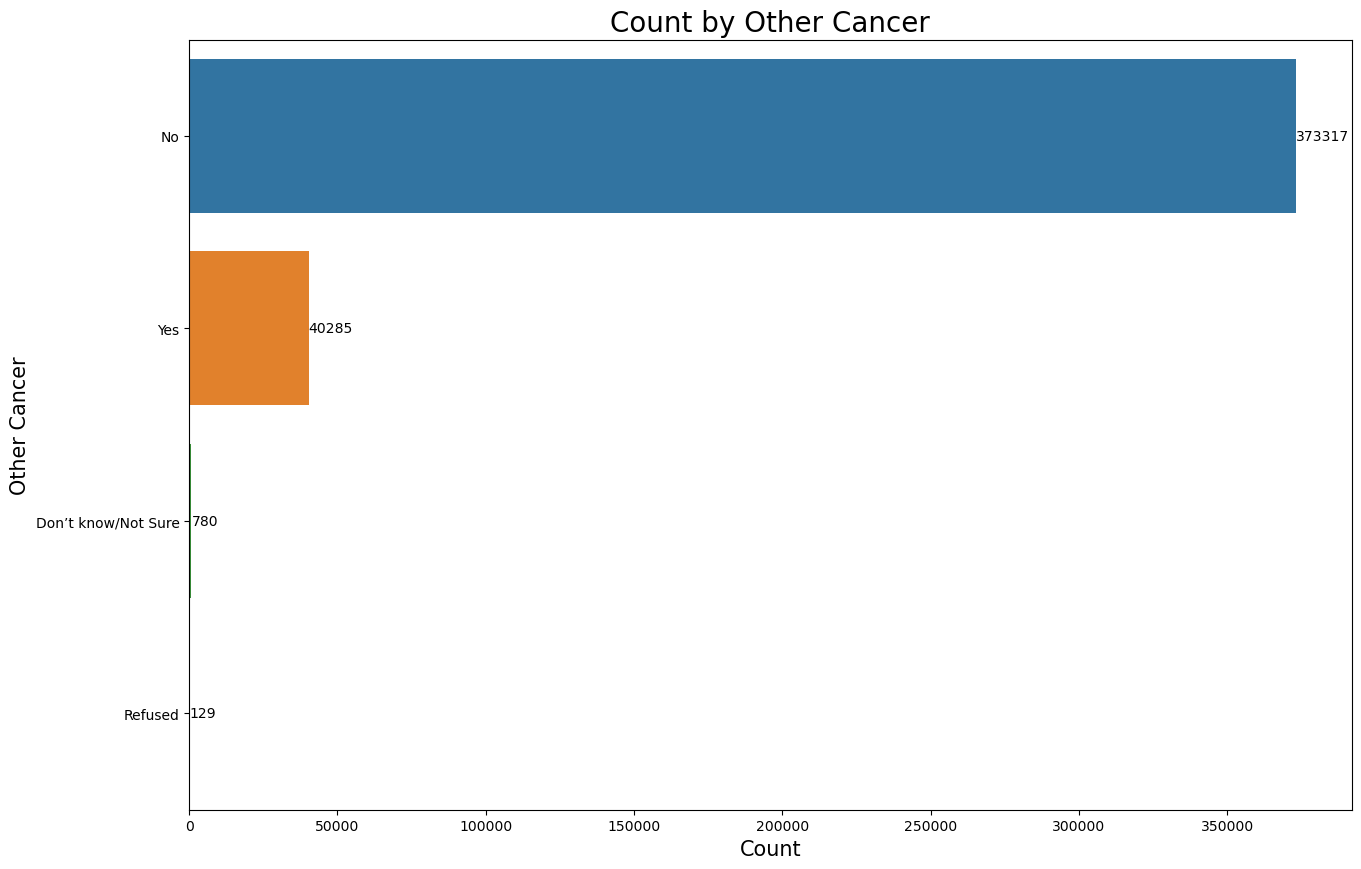

In [13]:
# Create barchart of counts for each categories
for c in cat_columns_description.keys():
    plt.figure(figsize = (15, 10))
    ax = sns.barplot(y = df_ran[c].value_counts().index, x = df_ran[c].value_counts().values)
    ax.bar_label(ax.containers[0])
    plt.title(f'Count by {cat_columns_description[c]}', size = 20)
    plt.xlabel('Count', size = 15)
    plt.ylabel(f'{cat_columns_description[c]}', size = 15);

In [30]:
# Create barchart of counts for each categories
# for c in cat_columns_description.keys():
#     plt.figure(figsize = (15, 10))
#     ax = sns.barplot(y = df_ran[c].value_counts(normalize=True).index, x = df_ran[c].value_counts(normalize=True).values)
#     ax.bar_label(ax.containers[0])
#     plt.title(f'Count by {cat_columns_description[c]}', size = 20)
#     plt.xlabel('Count', size = 15)
#     plt.ylabel(f'{cat_columns_description[c]}', size = 15);

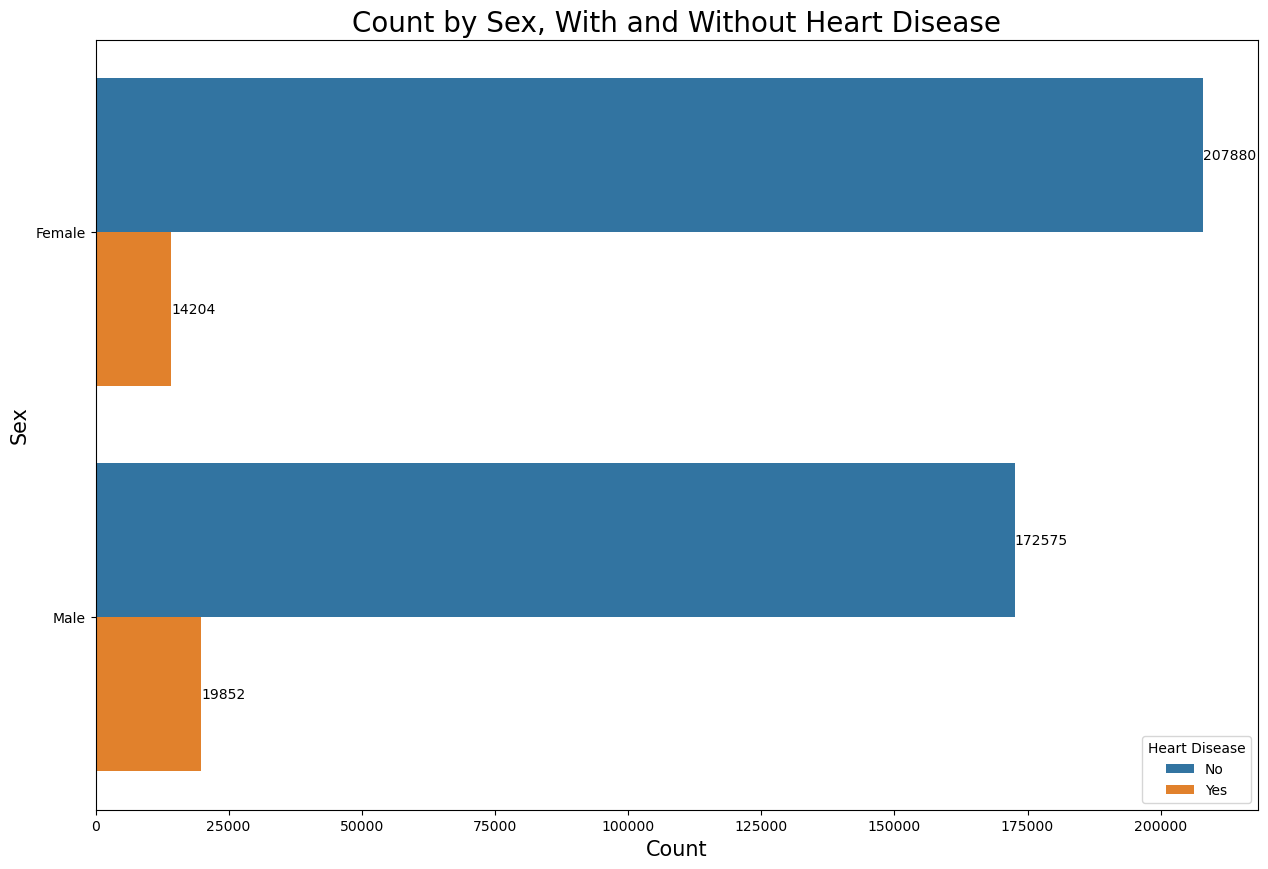

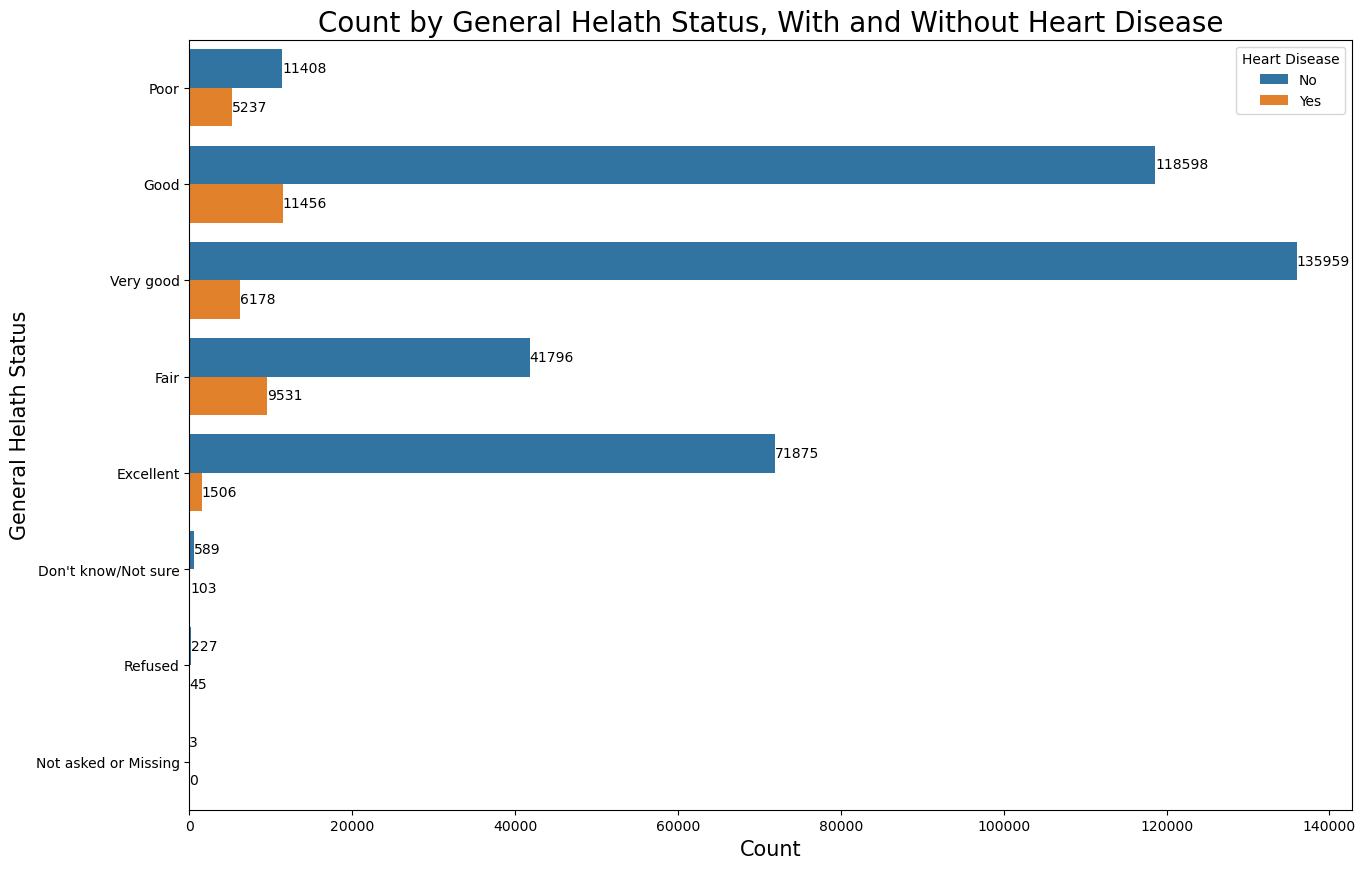

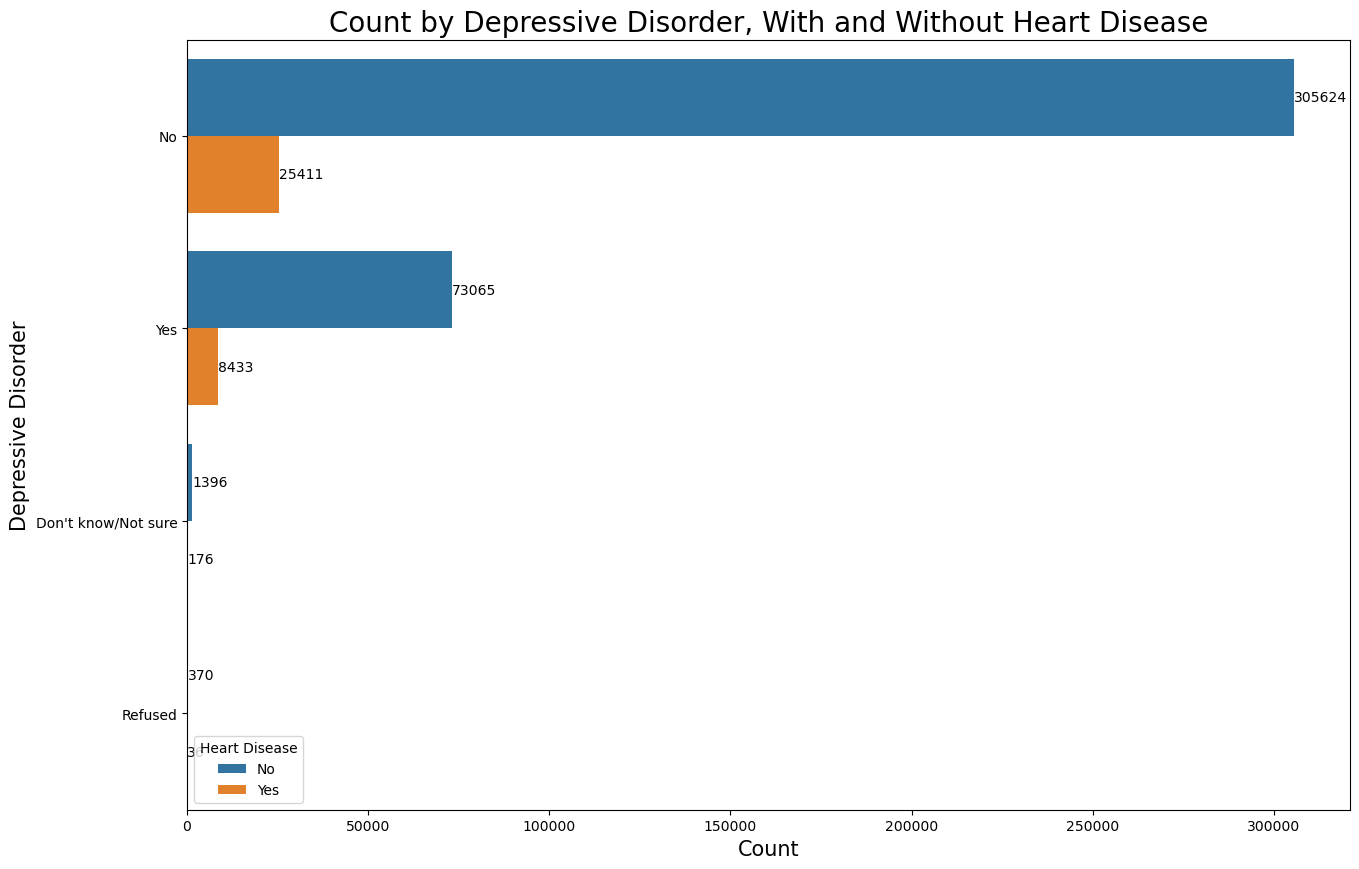

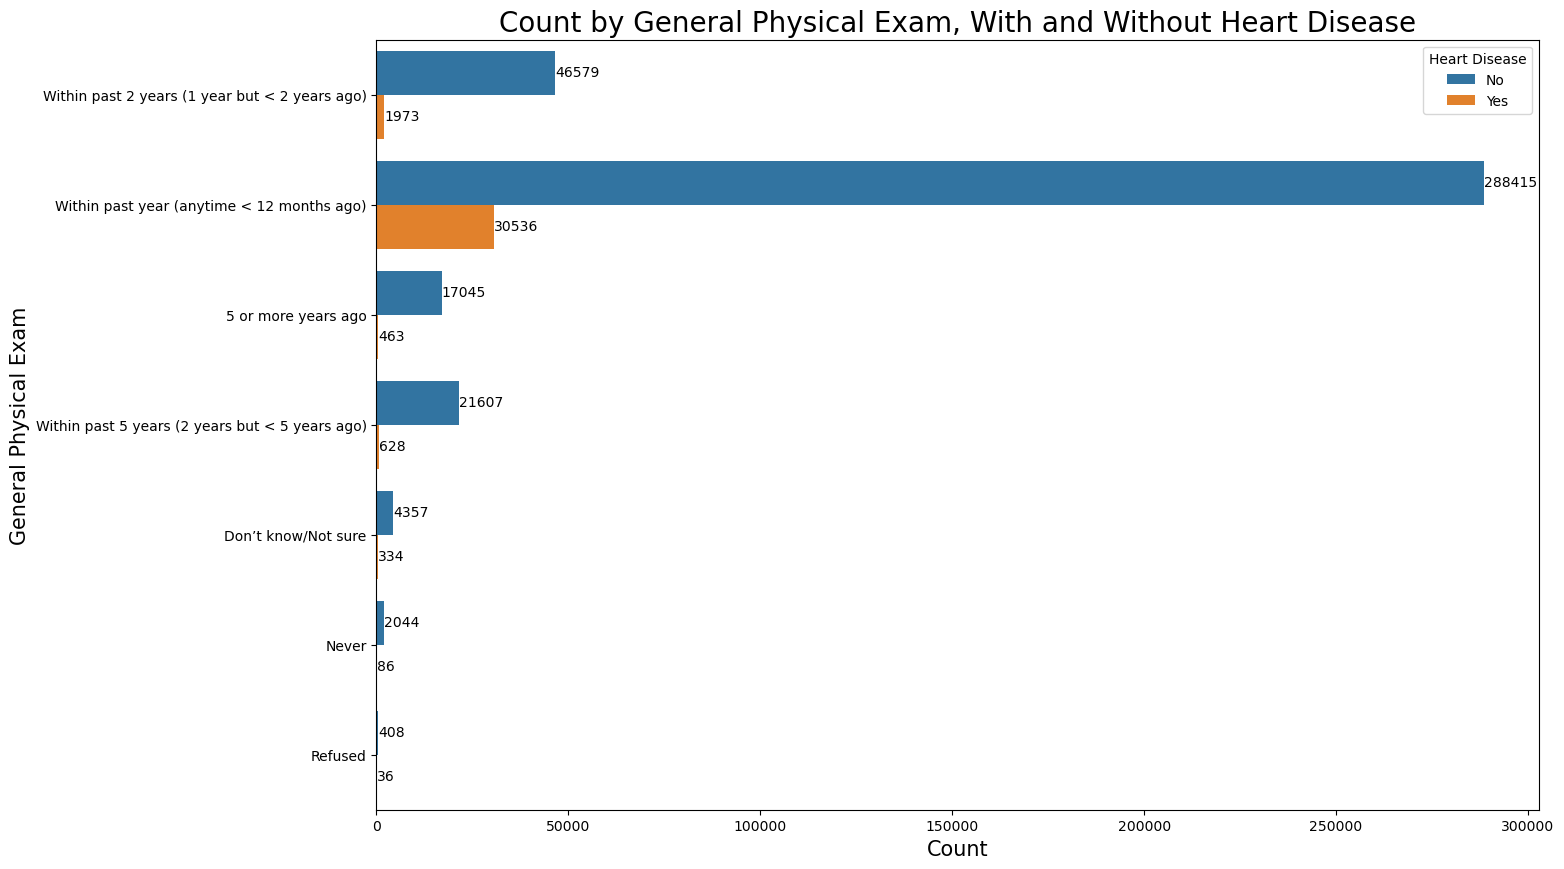

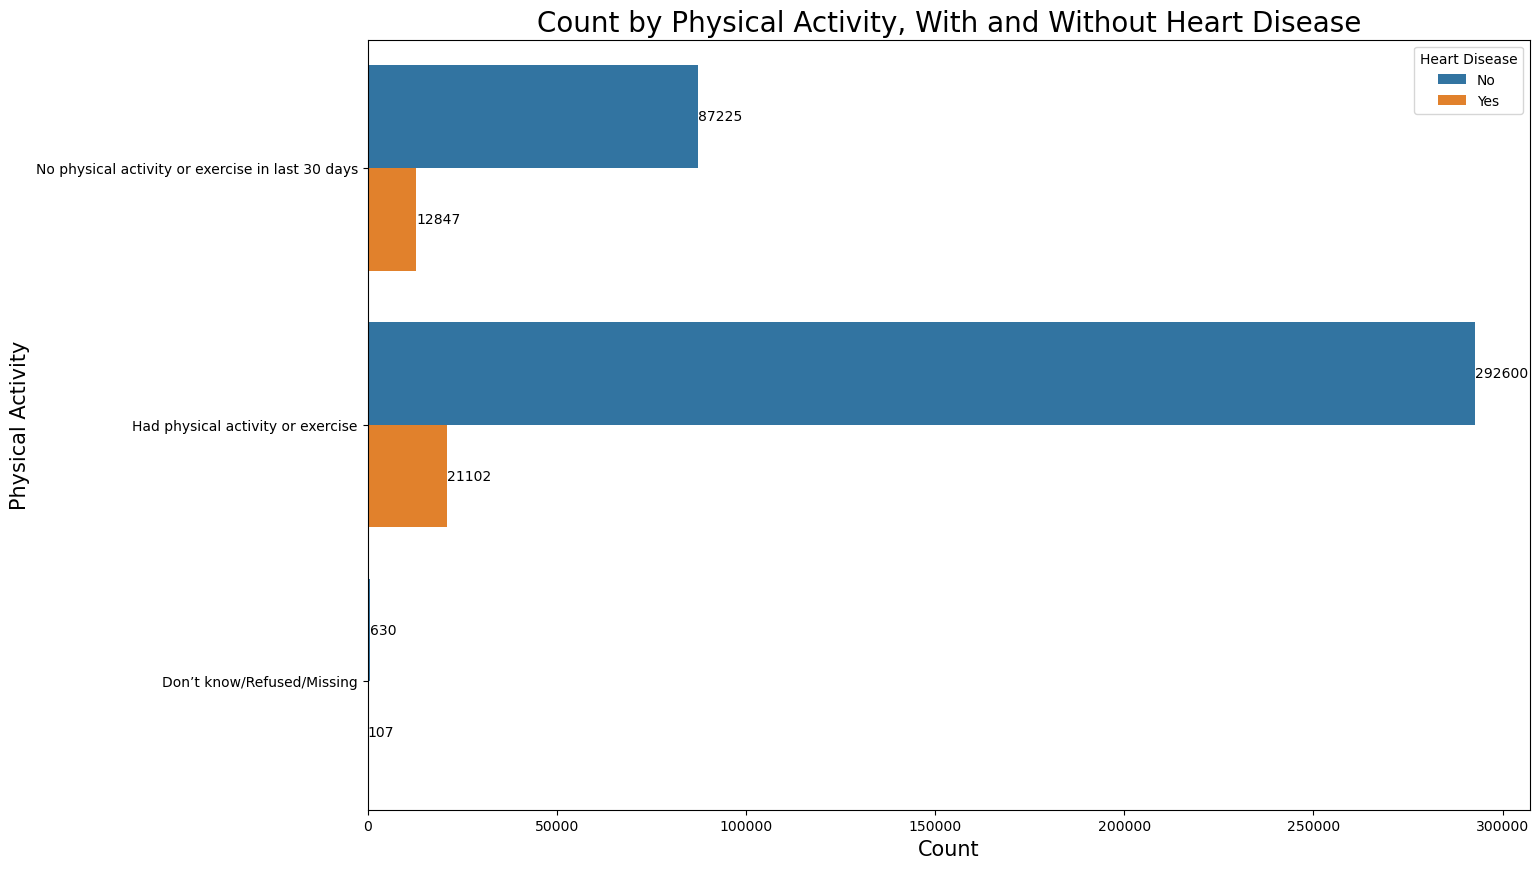

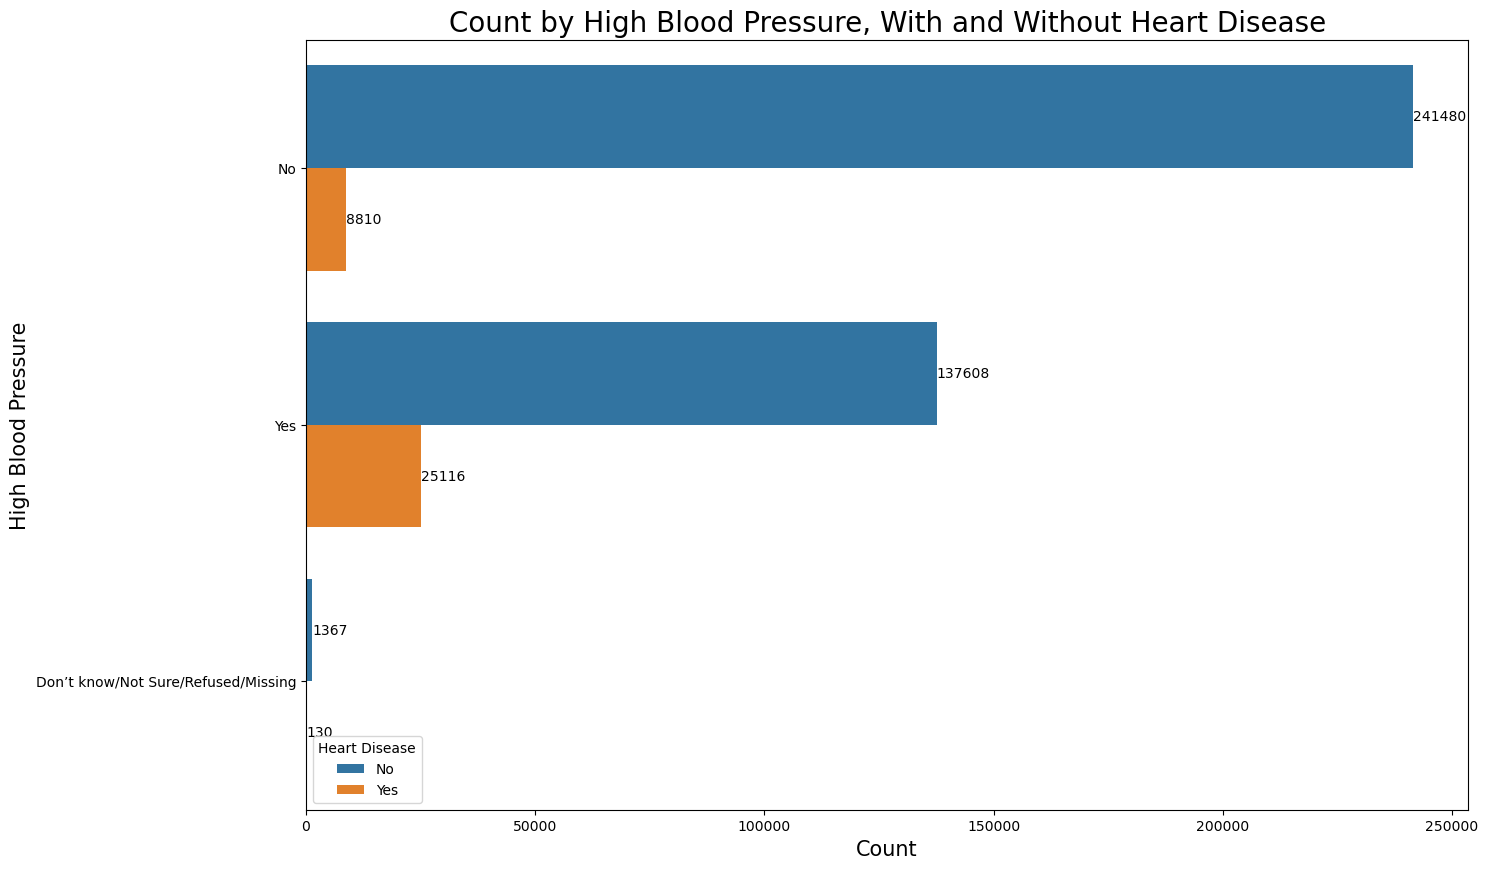

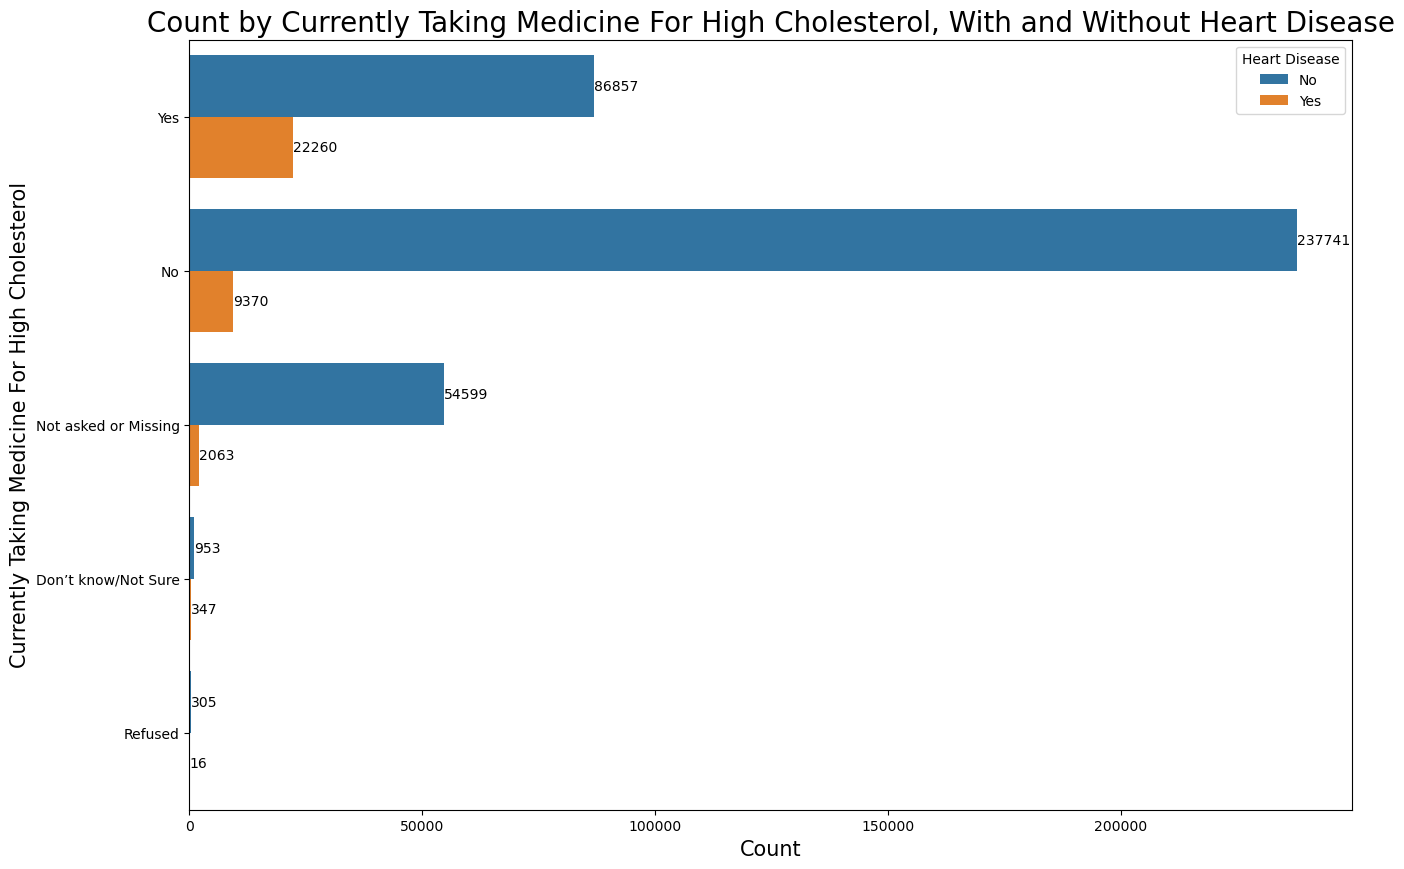

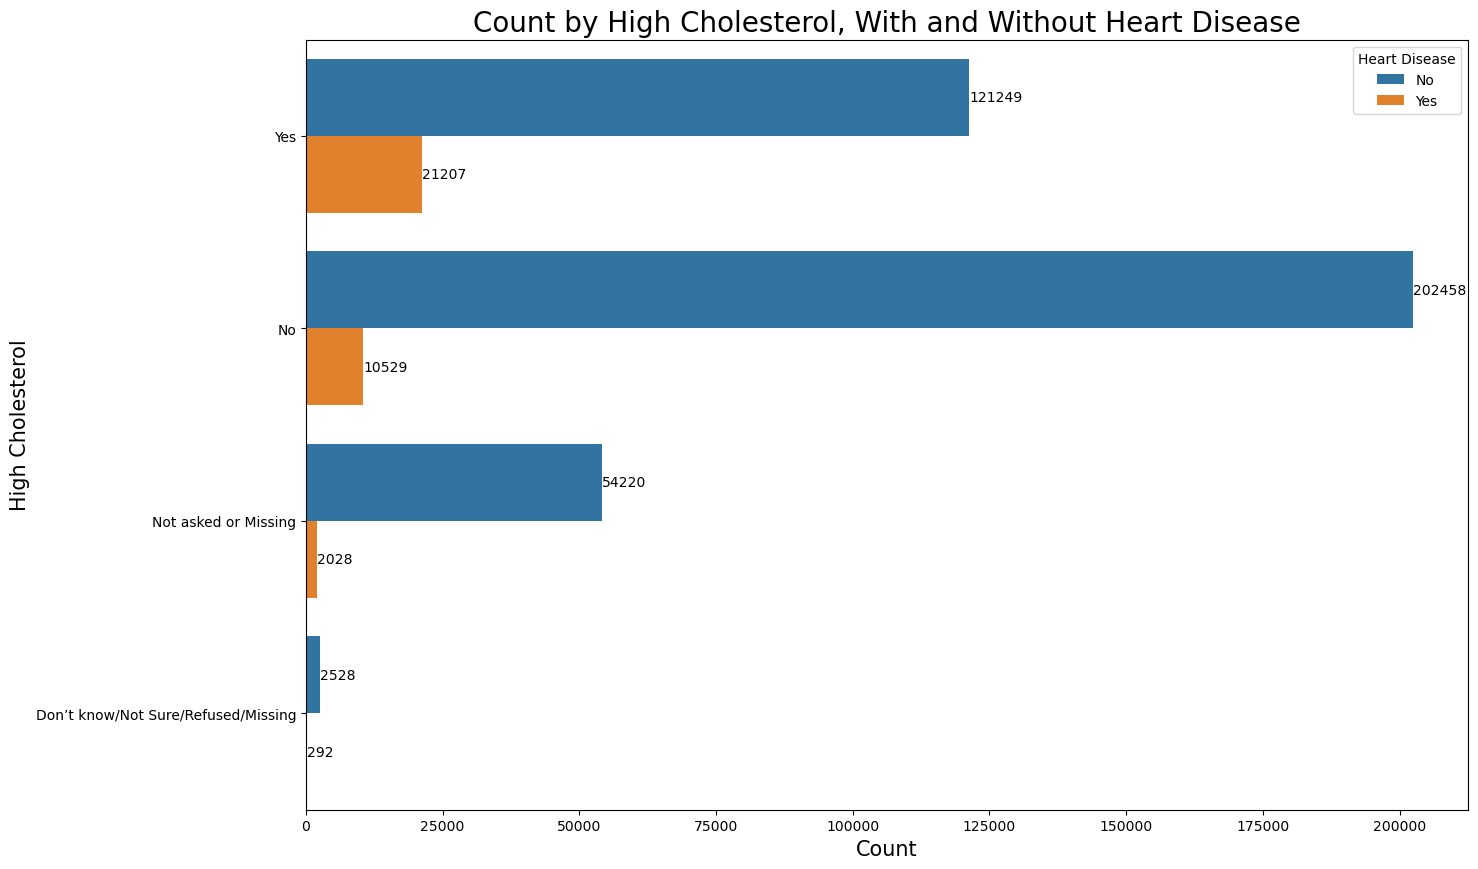

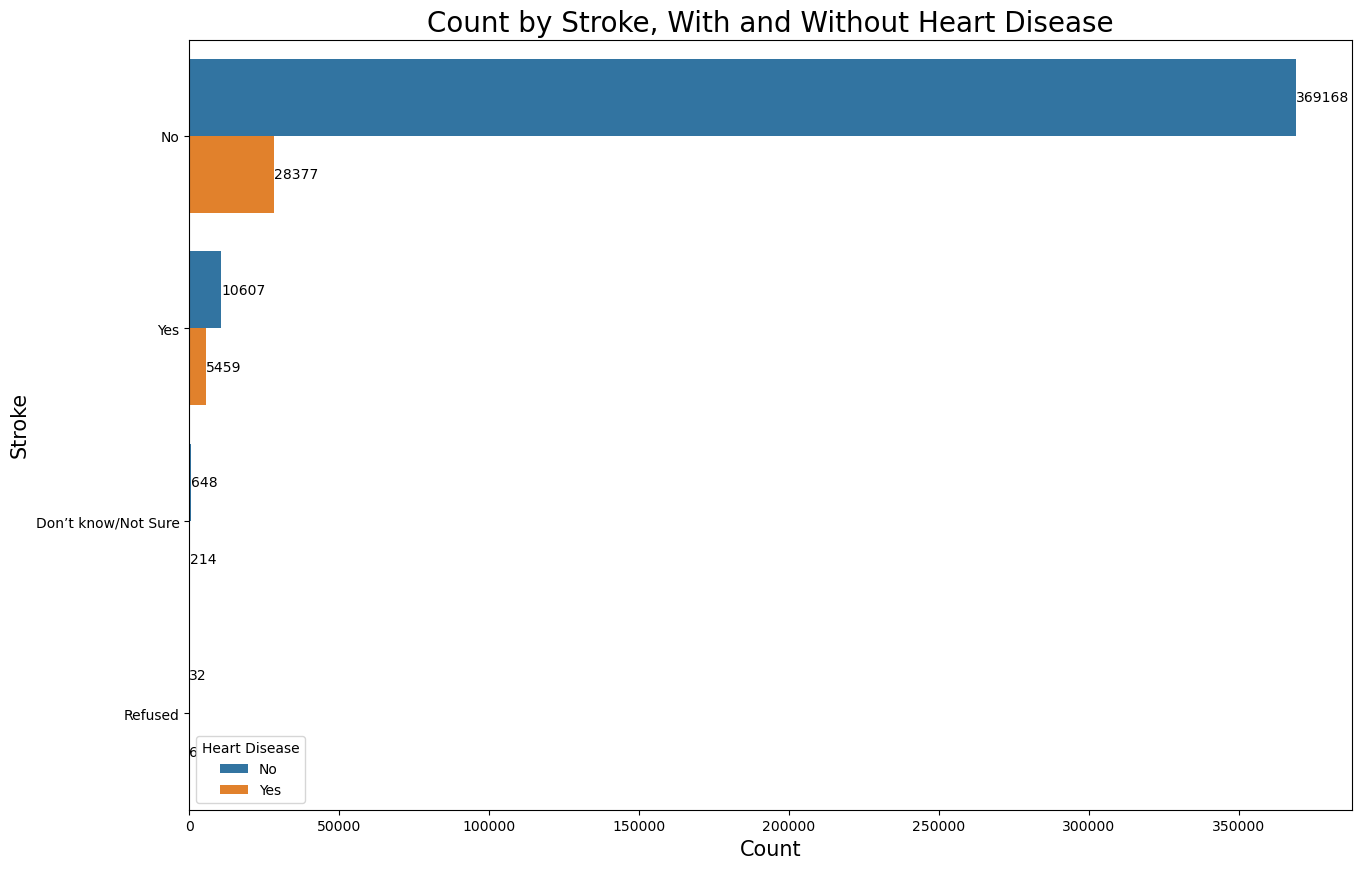

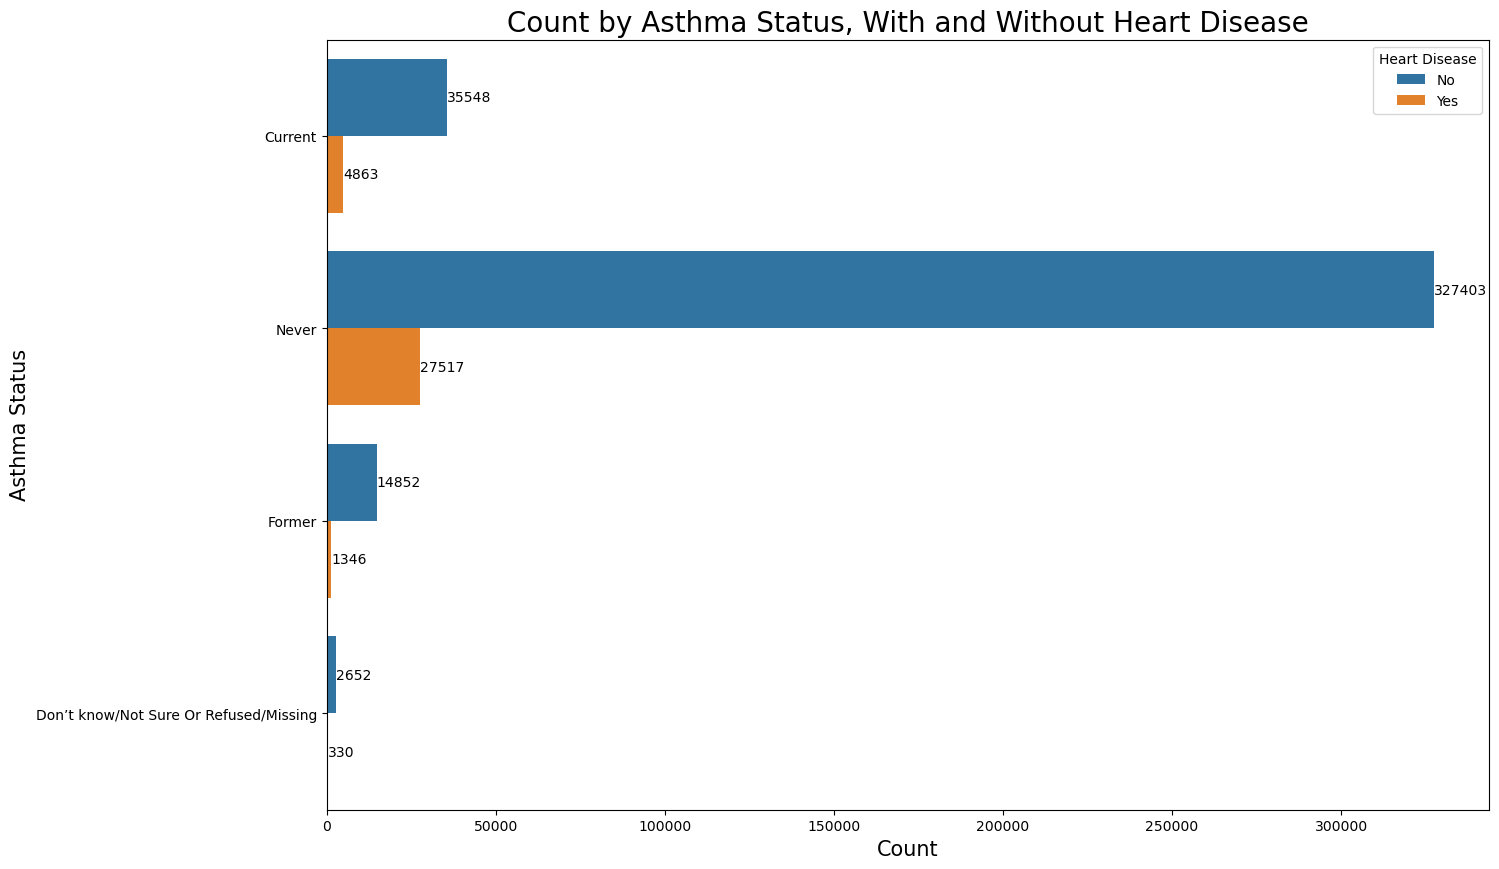

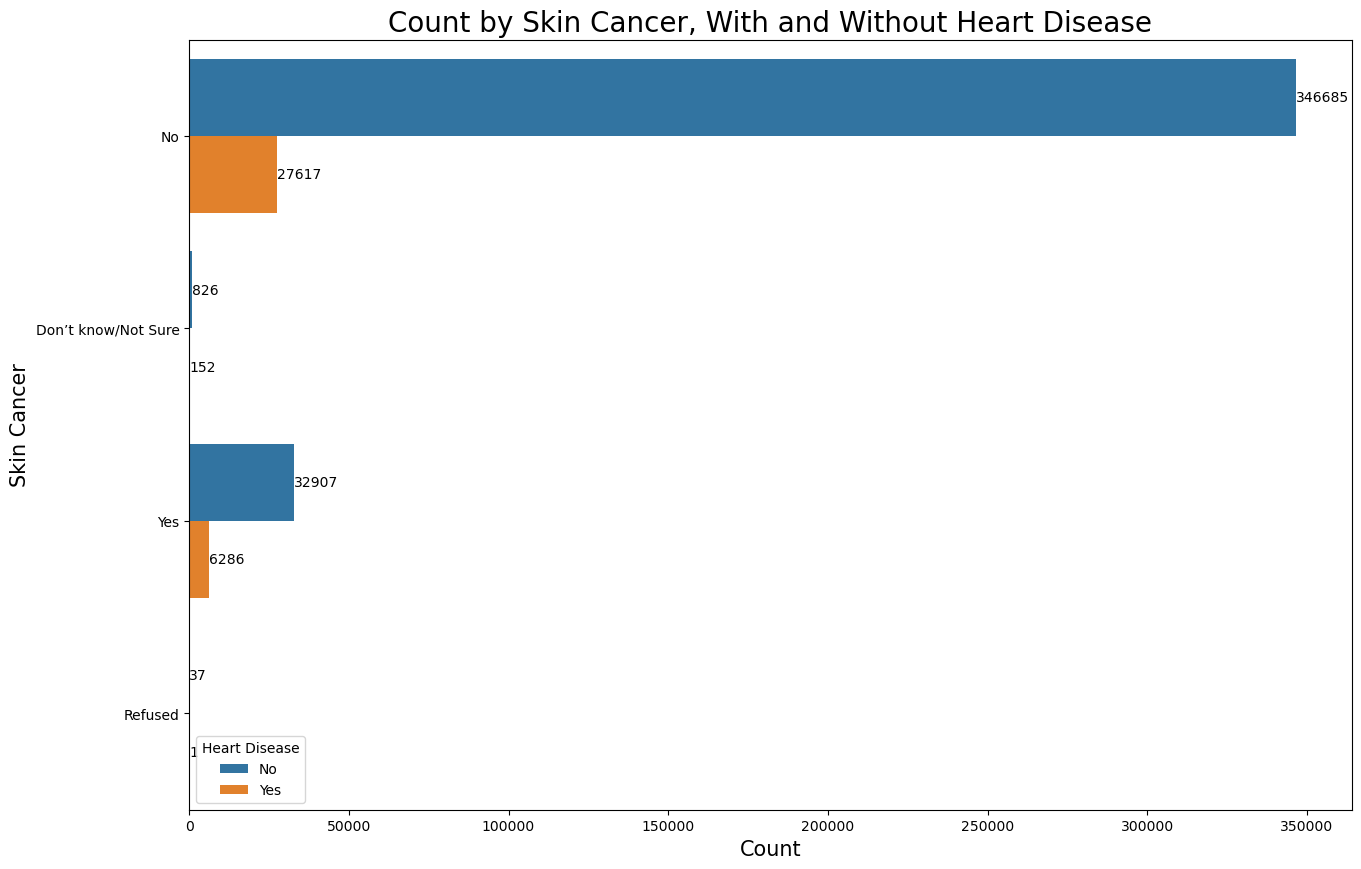

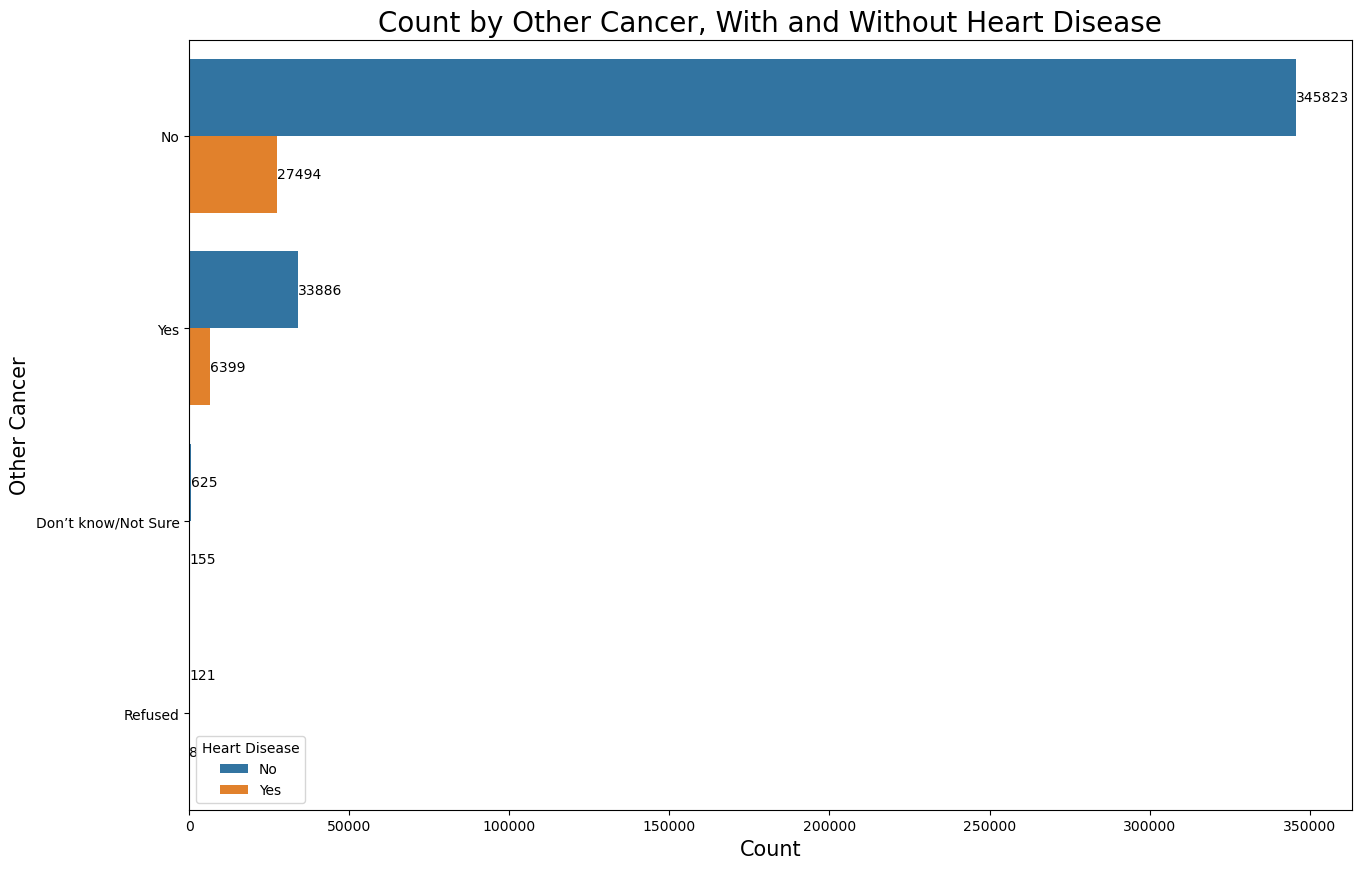

In [15]:
# Compare number of people with heart disease between each columns
df_ran = df_ran.rename(columns = {'_michd': 'Heart Disease'})

for c in cat_columns_description.keys():
    plt.figure(figsize = (15, 10))
    ax = sns.countplot(y = df_ran[c], hue = df_ran['Heart Disease'])
    
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(f'Count by {cat_columns_description[c]}, With and Without Heart Disease', size = 20)
    plt.ylabel(f'{cat_columns_description[c]}', size = 15)
    plt.xlabel('Count', size = 15);

In [16]:
df_ran.head()

,Heart Disease,_sex,genhlth,physhlth,menthlth,addepev3,checkup1,_totinda,_rfhype6,cholmed3,_rfchol3,cvdstrk3,_asthms1,chcscncr,chcocncr
0,No,Female,Poor,20.0,10.0,No,Within past 2 years (1 year but < 2 years ago),No physical activity or exercise in last 30 days,No,Yes,Yes,No,Current,No,No
1,Yes,Female,Good,0.0,0.0,No,Within past year (anytime < 12 months ago),Had physical activity or exercise,Yes,Yes,Yes,No,Never,No,No
2,Yes,Female,Very good,0.0,0.0,No,Within past year (anytime < 12 months ago),No physical activity or exercise in last 30 days,Yes,No,No,No,Never,No,No
3,No,Female,Very good,0.0,10.0,No,Within past year (anytime < 12 months ago),Had physical activity or exercise,Yes,No,Yes,No,Never,No,No
4,Yes,Male,Poor,30.0,0.0,No,Within past year (anytime < 12 months ago),Had physical activity or exercise,No,Yes,Yes,Yes,Never,No,No


In [17]:
df_ran['Heart_Disease'] = df_ran['Heart Disease'].apply(lambda x: 1 if x == 'Yes' else 0)

In [18]:
df_ran.head()

,Heart Disease,_sex,genhlth,physhlth,menthlth,addepev3,checkup1,_totinda,_rfhype6,cholmed3,_rfchol3,cvdstrk3,_asthms1,chcscncr,chcocncr,Heart_Disease
0,No,Female,Poor,20.0,10.0,No,Within past 2 years (1 year but < 2 years ago),No physical activity or exercise in last 30 days,No,Yes,Yes,No,Current,No,No,0
1,Yes,Female,Good,0.0,0.0,No,Within past year (anytime < 12 months ago),Had physical activity or exercise,Yes,Yes,Yes,No,Never,No,No,1
2,Yes,Female,Very good,0.0,0.0,No,Within past year (anytime < 12 months ago),No physical activity or exercise in last 30 days,Yes,No,No,No,Never,No,No,1
3,No,Female,Very good,0.0,10.0,No,Within past year (anytime < 12 months ago),Had physical activity or exercise,Yes,No,Yes,No,Never,No,No,0
4,Yes,Male,Poor,30.0,0.0,No,Within past year (anytime < 12 months ago),Had physical activity or exercise,No,Yes,Yes,Yes,Never,No,No,1


In [19]:
df_ran.groupby('_sex').agg({'Heart_Disease': 'mean'})

,Heart_Disease
_sex,
Female,0.063958
Male,0.103166


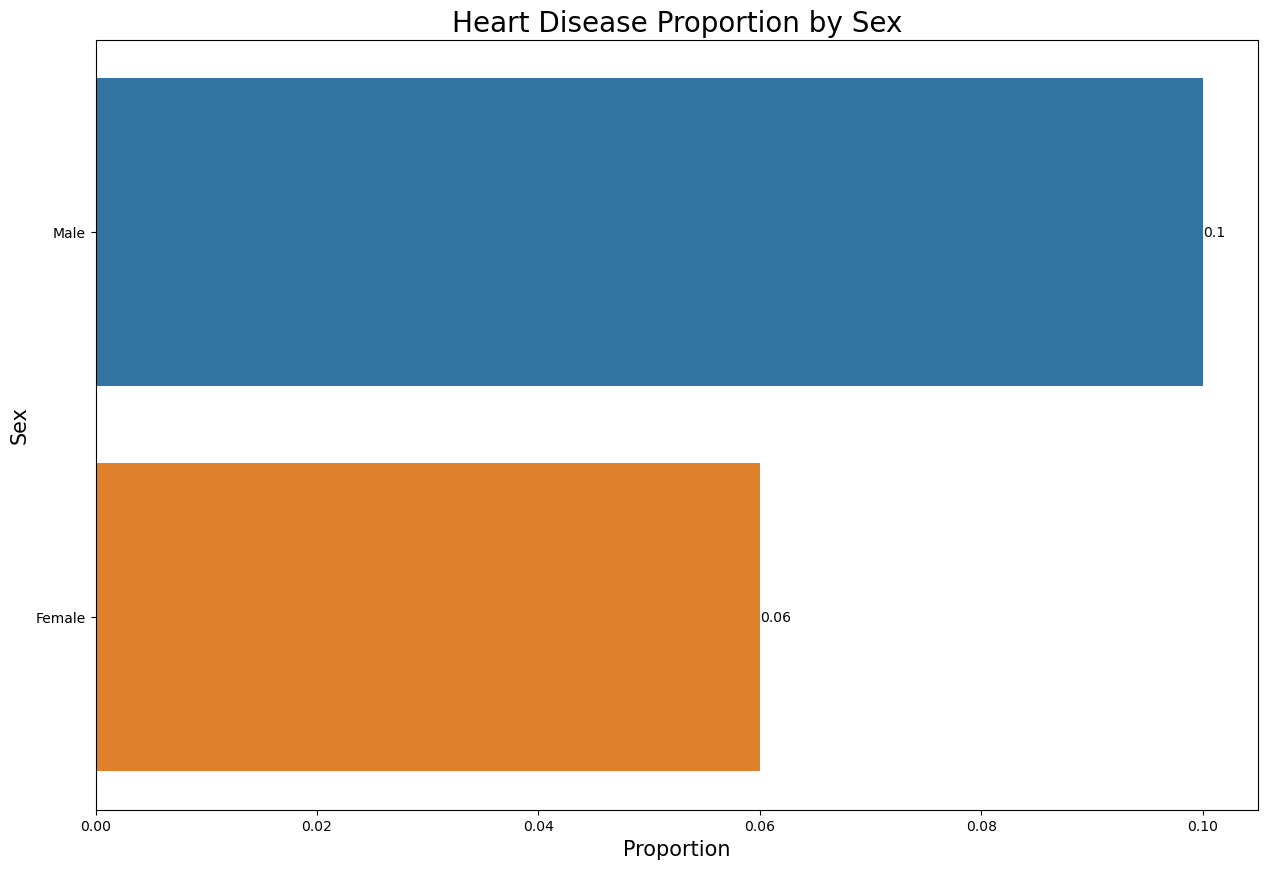

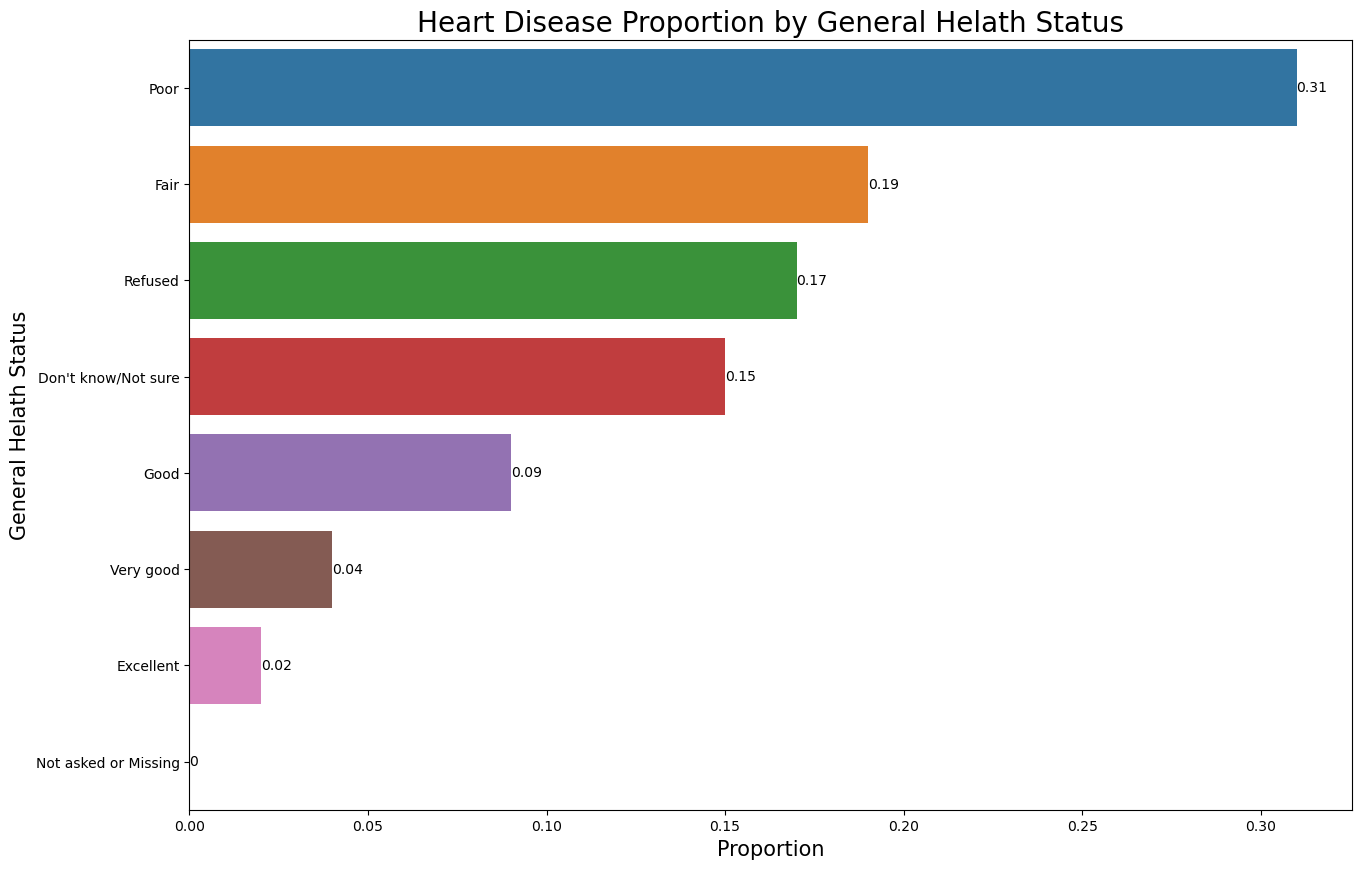

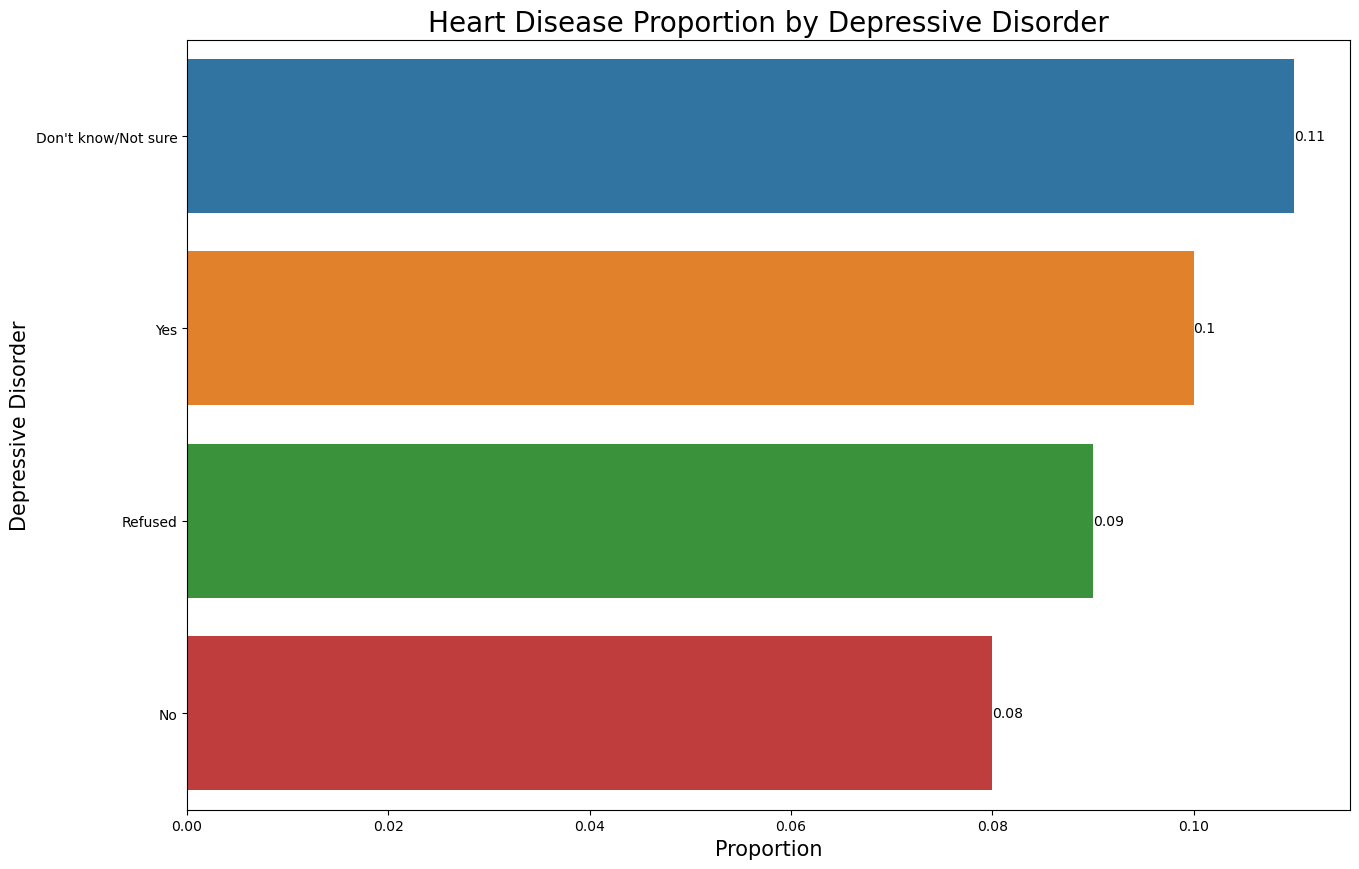

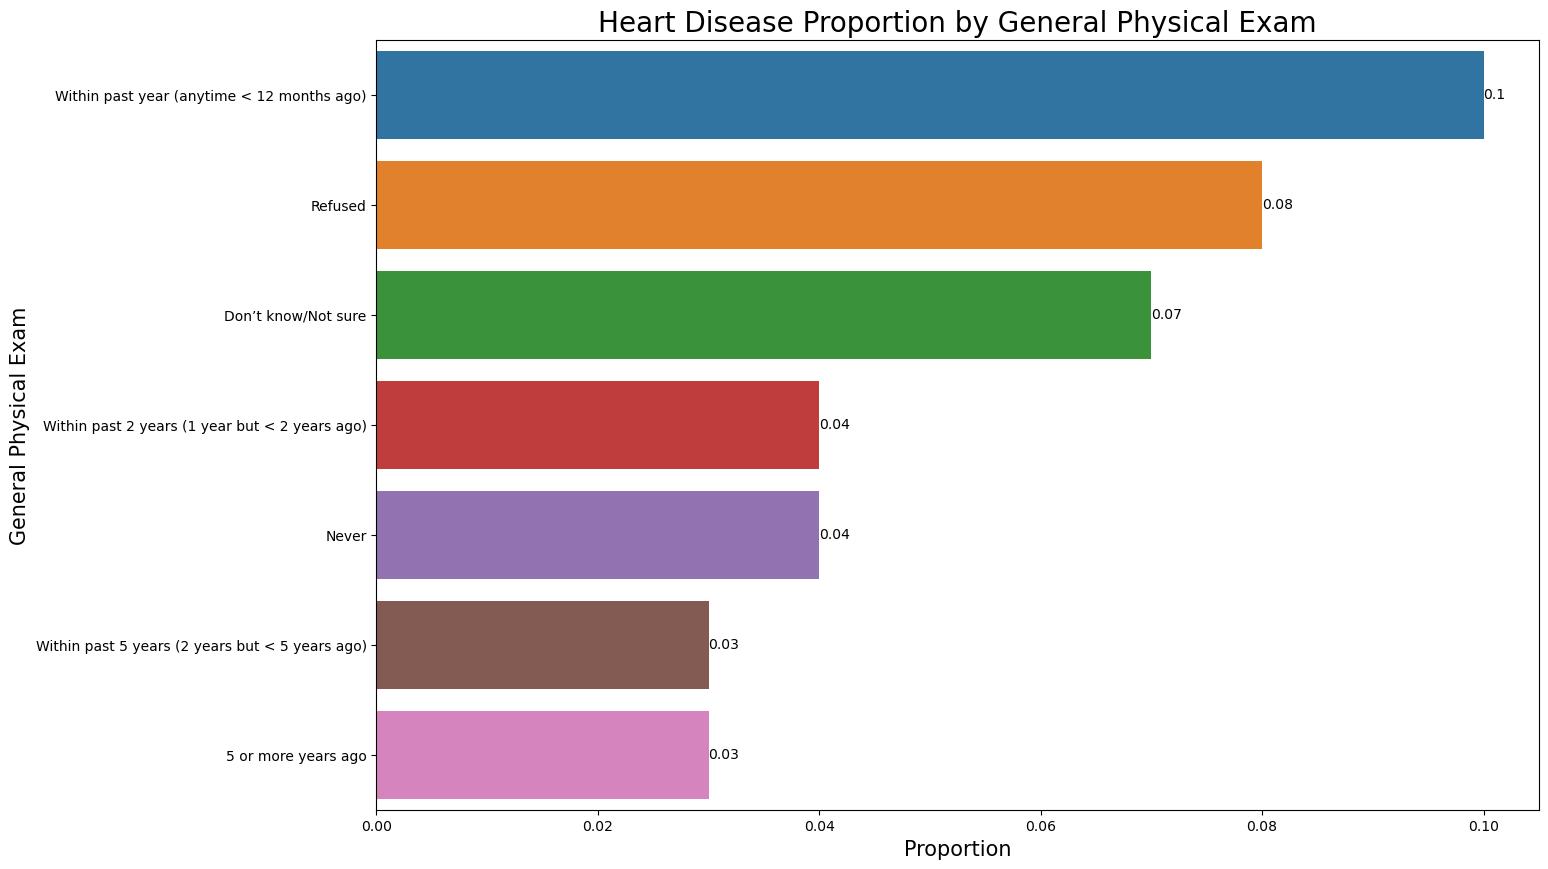

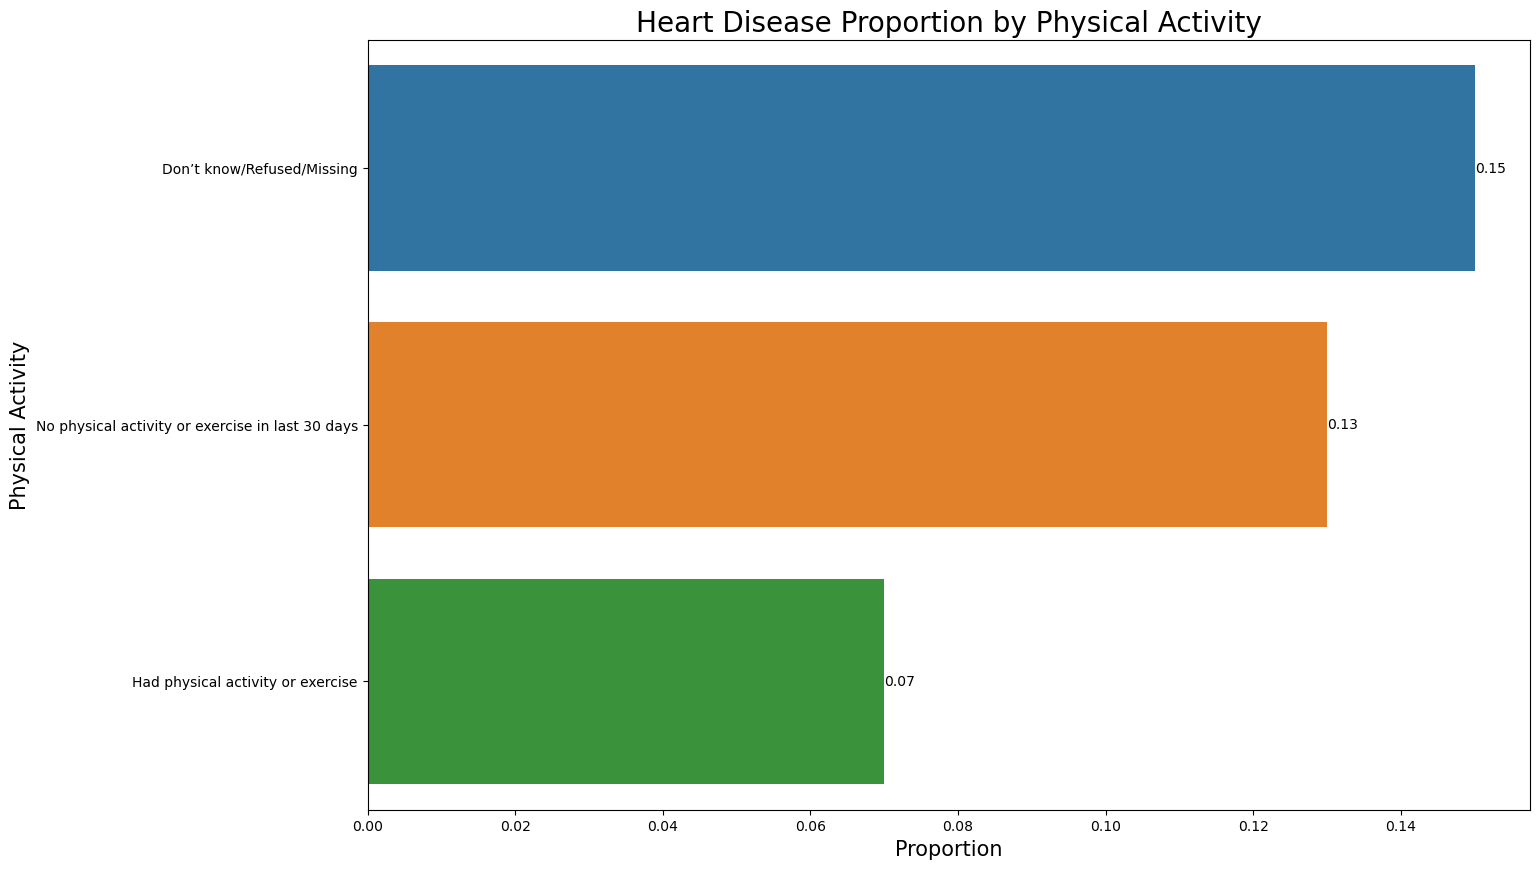

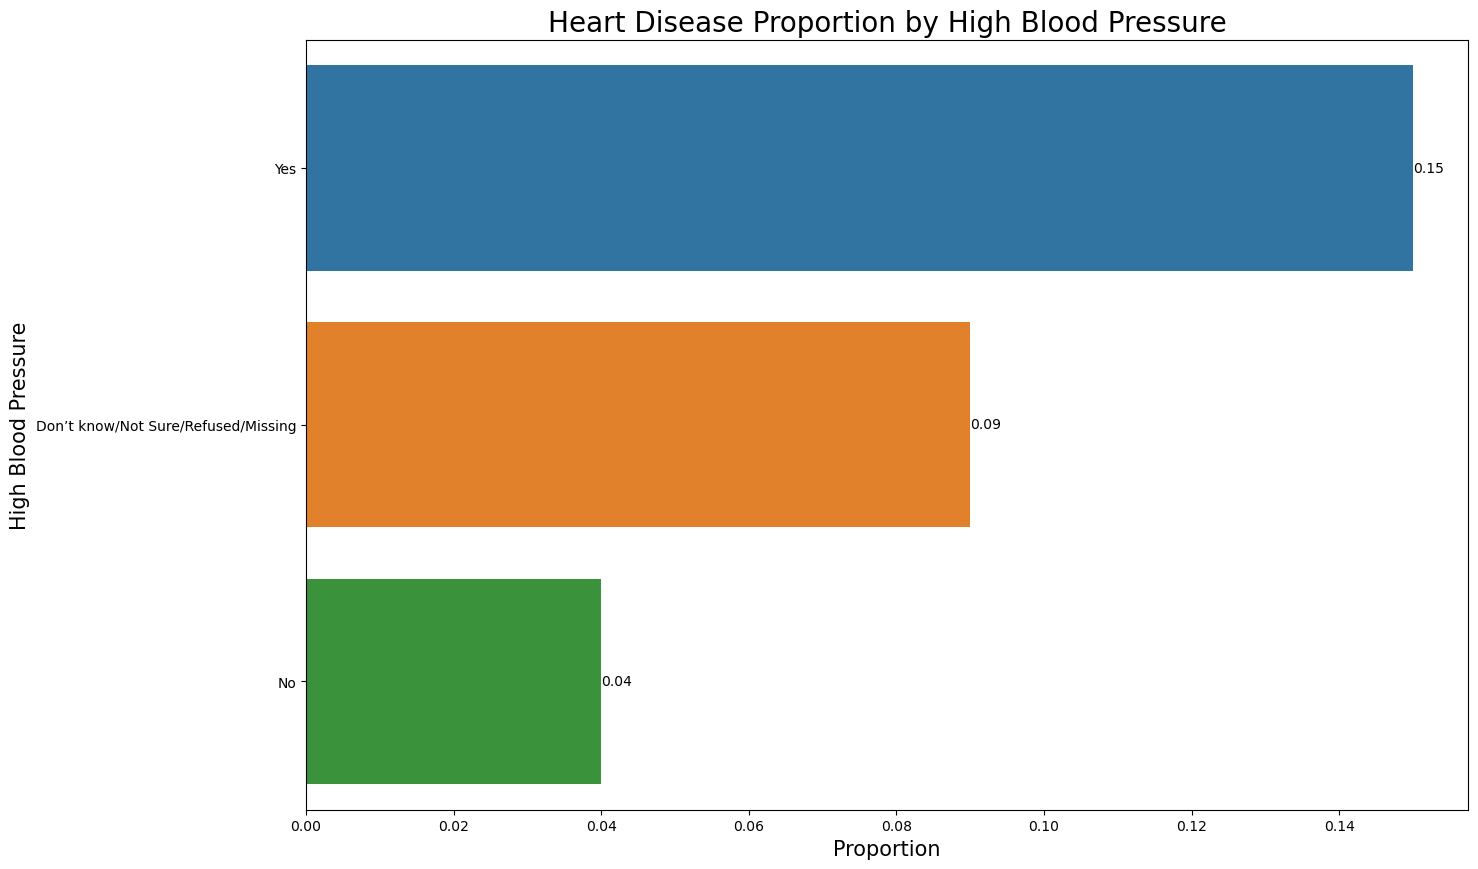

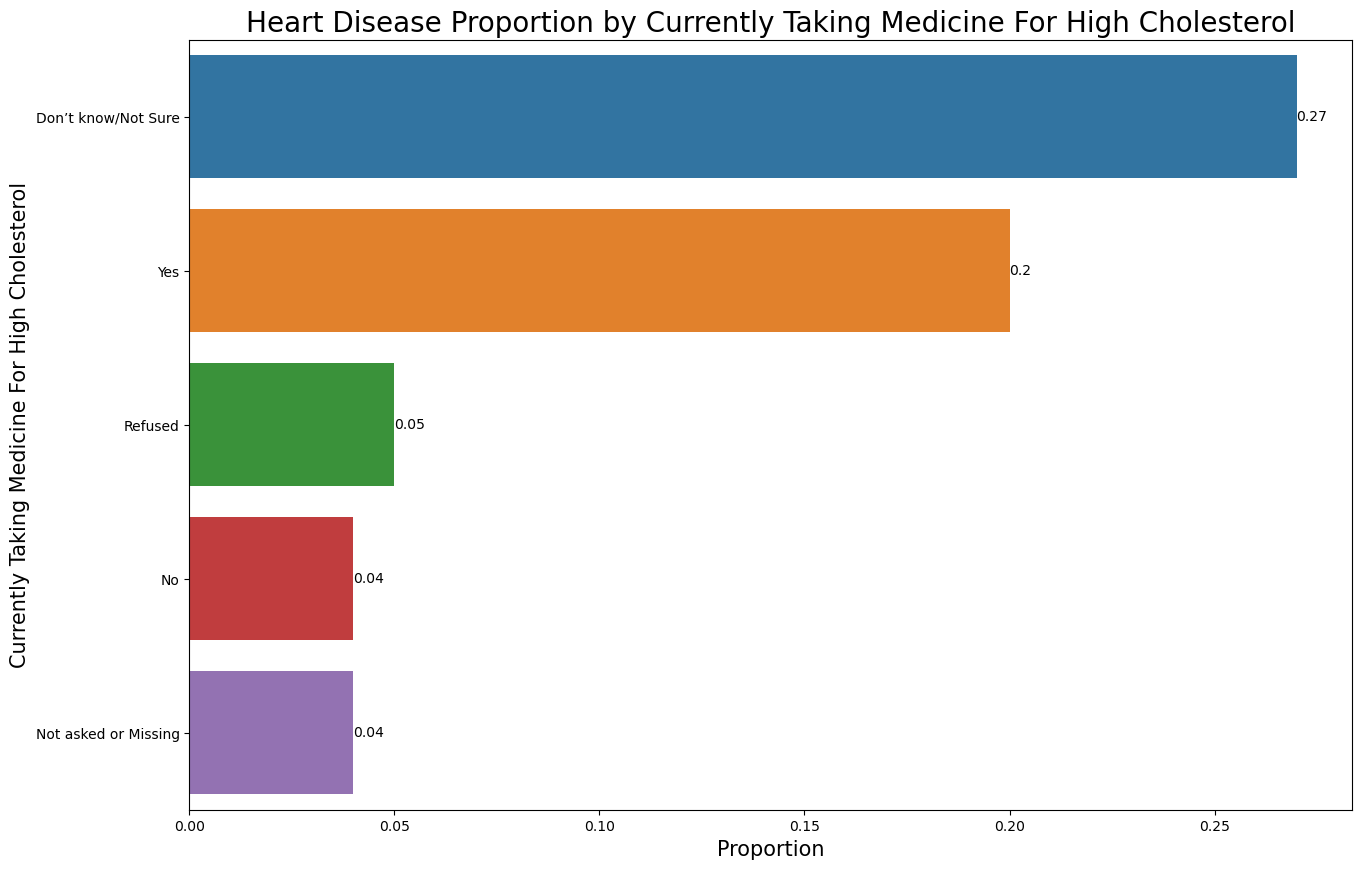

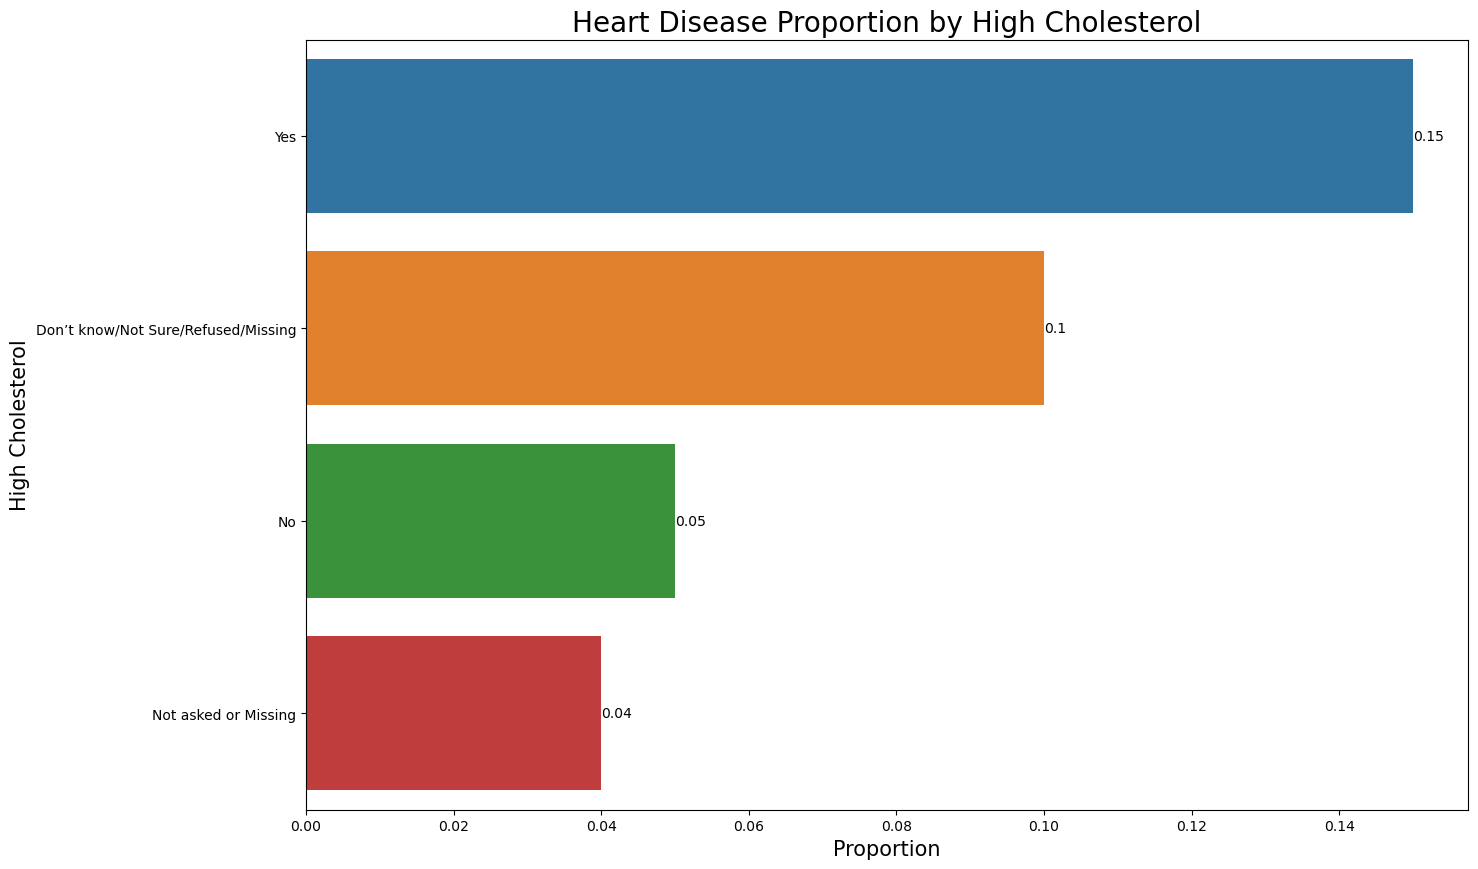

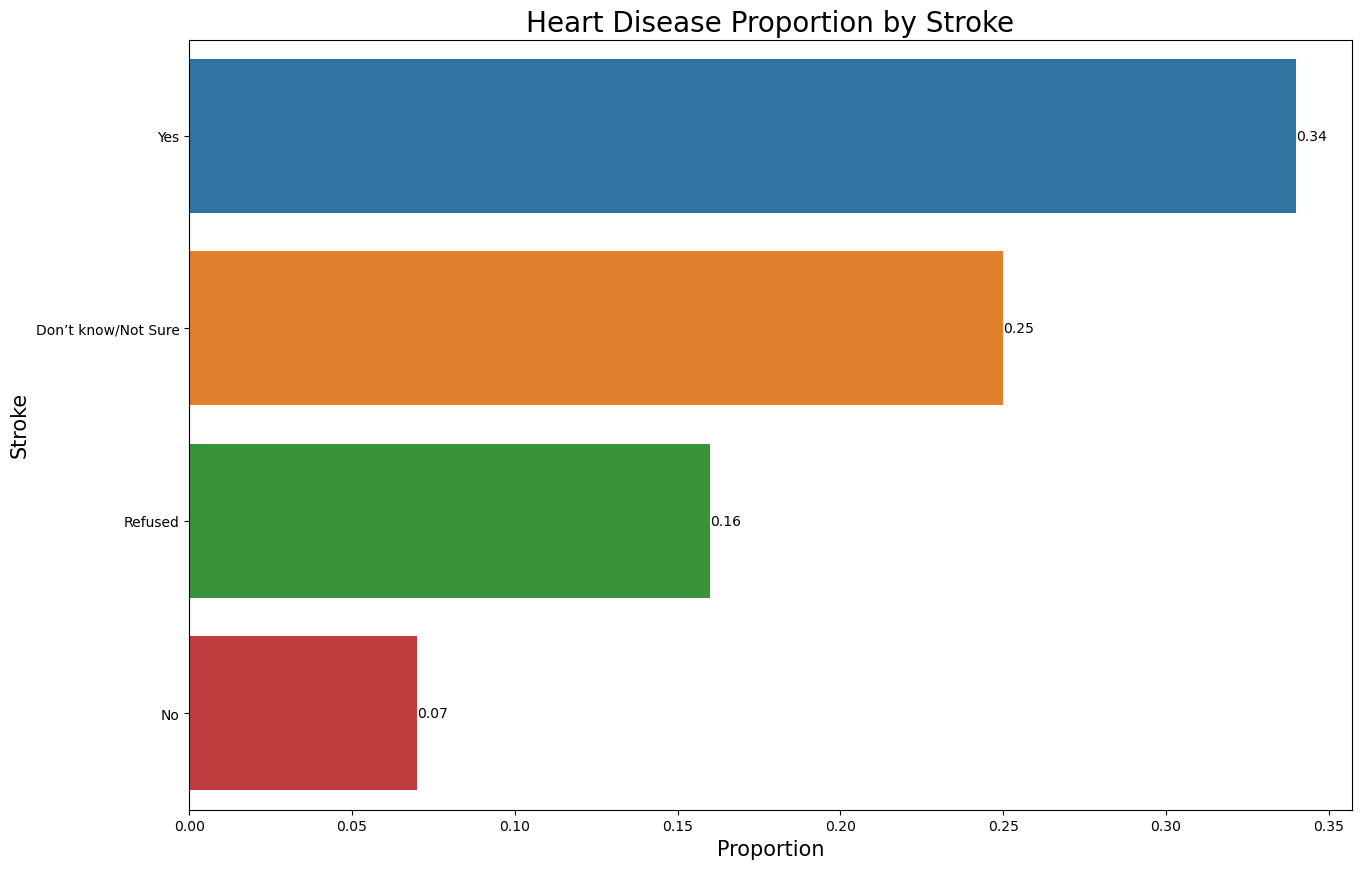

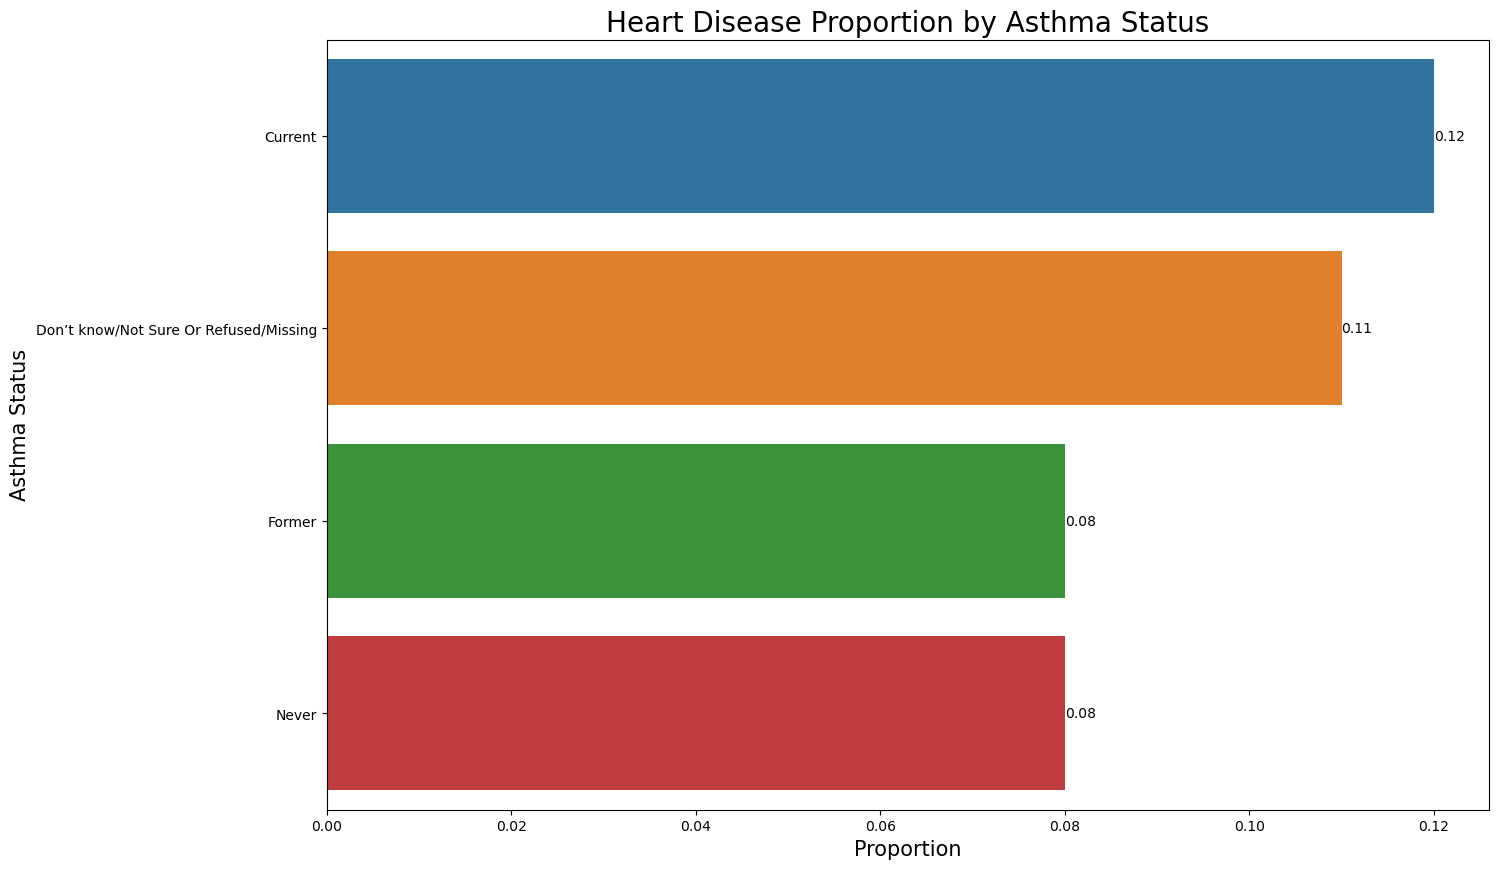

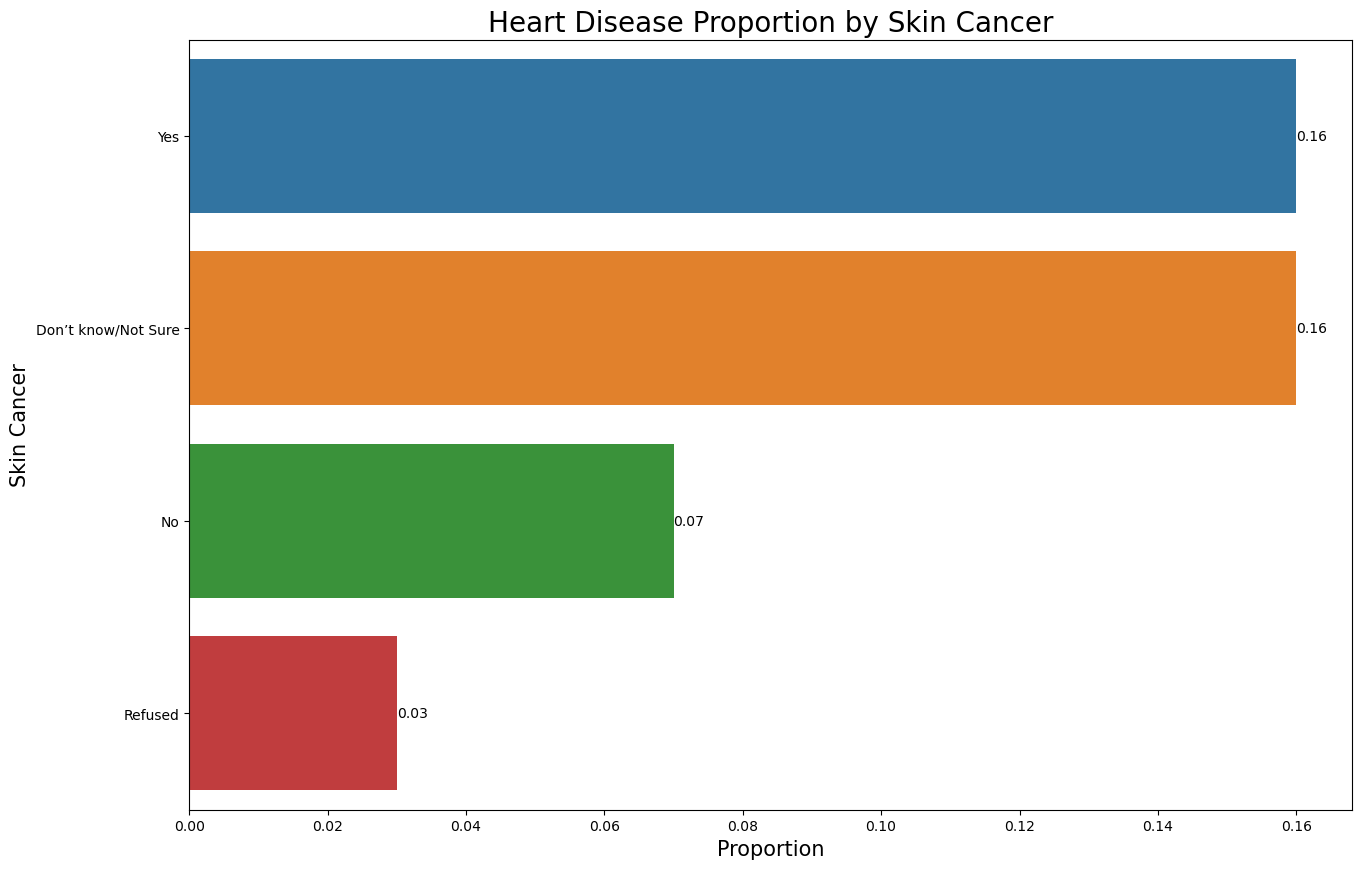

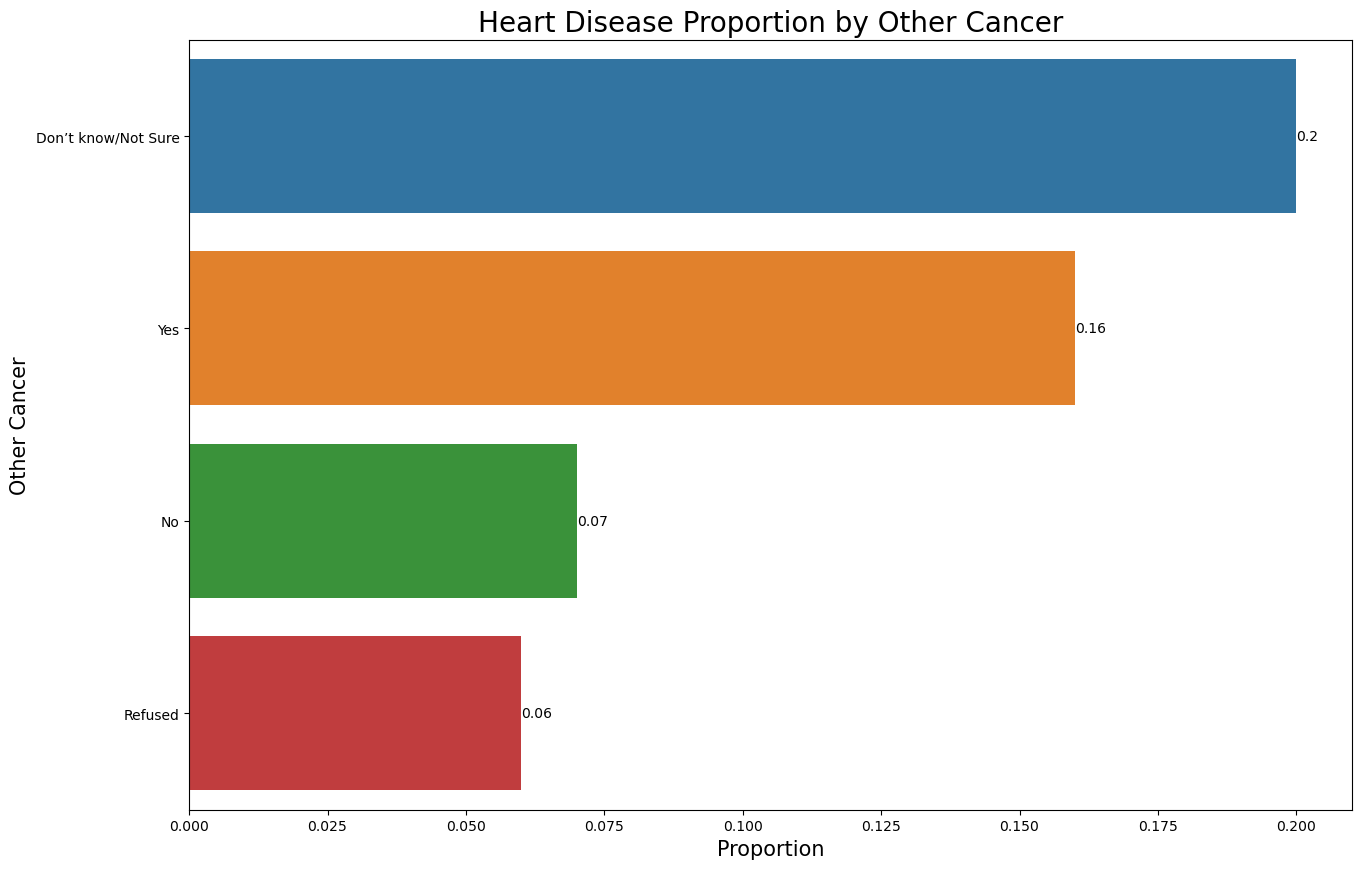

In [20]:
# Compare proportion of people with heart disease between each columns
for c in cat_columns_description.keys():
    plt.figure(figsize = (15, 10))
    cur_df = df_ran.groupby(c).agg({'Heart_Disease': 'mean'})
    cur_df.sort_values('Heart_Disease', ascending = False, inplace = True)
    cur_df['Heart_Disease'] = cur_df['Heart_Disease'].apply(lambda x: round(x, 2))
    ax = sns.barplot(x = cur_df['Heart_Disease'], y = cur_df.index)
    ax.bar_label(ax.containers[0])
    plt.title(f'Heart Disease Proportion by {cat_columns_description[c]}', size = 20)
    plt.xlabel('Proportion', size = 15)
    plt.ylabel(f'{cat_columns_description[c]}', size = 15);

In [21]:
# EDA for Numerical Variables

In [22]:
df_ran.describe()

,physhlth,menthlth,Heart_Disease
count,406020.000000,407427.000000,414511.000000
mean,3.776366,4.106490,0.082159
std,8.322599,8.148143,0.274608
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,2.000000,4.000000,0.000000
max,30.000000,30.000000,1.000000


In [23]:
num_col = [k for k in num_columns_description.keys()]

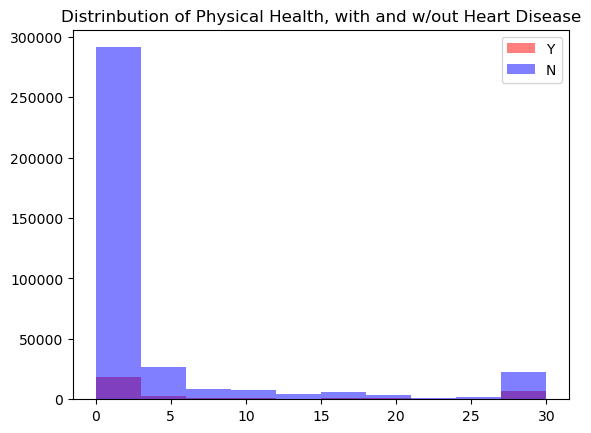

In [24]:
heart_disease = df_ran[df_ran['Heart Disease'] == 'Yes']
no_heart_disease = df_ran[df_ran['Heart Disease'] == 'No']

plt.hist(heart_disease['physhlth'], color = 'r', alpha = 0.5, label = 'Y')
plt.hist(no_heart_disease['physhlth'], color = 'b', alpha = 0.5, label = 'N')

plt.legend()
plt.title('Distrinbution of Physical Health, with and w/out Heart Disease');

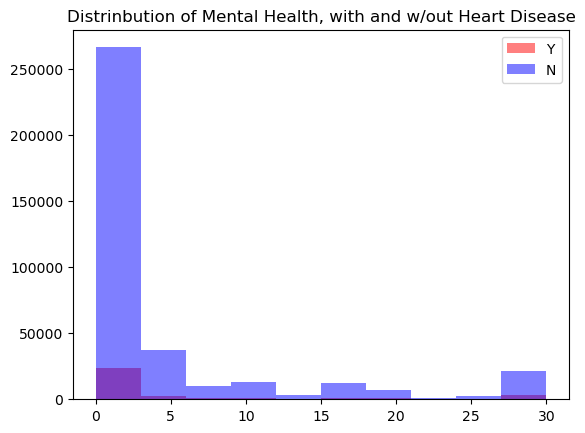

In [25]:
heart_disease = df_ran[df_ran['Heart Disease'] == 'Yes']
no_heart_disease = df_ran[df_ran['Heart Disease'] == 'No']

plt.hist(heart_disease['menthlth'], color = 'r', alpha = 0.5, label = 'Y')
plt.hist(no_heart_disease['menthlth'], color = 'b', alpha = 0.5, label = 'N')

plt.legend()
plt.title('Distrinbution of Mental Health, with and w/out Heart Disease');

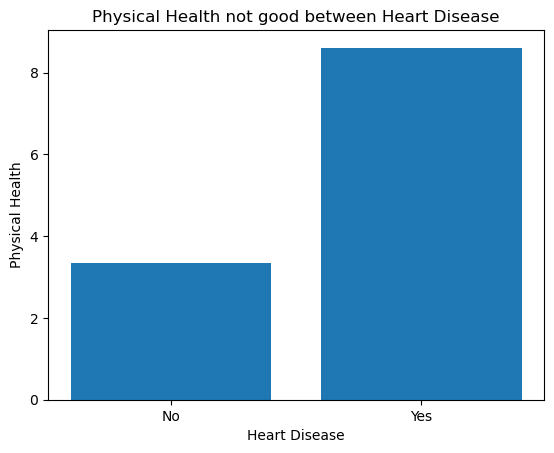

In [26]:
df_rate = df.groupby('_michd').agg({'physhlth': 'mean'})
plt.bar(df_rate.index, df_rate['physhlth'])
plt.title('Physical Health not good between Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Physical Health');

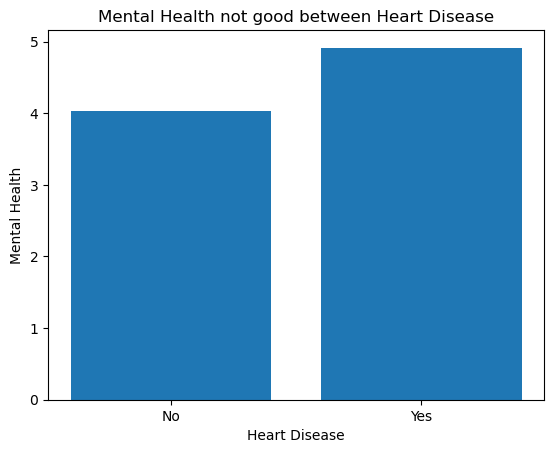

In [27]:
df_rate = df.groupby('_michd').agg({'menthlth': 'mean'})
plt.bar(df_rate.index, df_rate['menthlth'])
plt.title('Mental Health not good between Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Mental Health');

In [28]:
df_ran.columns

Index(['Heart Disease', '_sex', 'genhlth', 'physhlth', 'menthlth', 'addepev3',
       'checkup1', '_totinda', '_rfhype6', 'cholmed3', '_rfchol3', 'cvdstrk3',
       '_asthms1', 'chcscncr', 'chcocncr', 'Heart_Disease'],
      dtype='object')

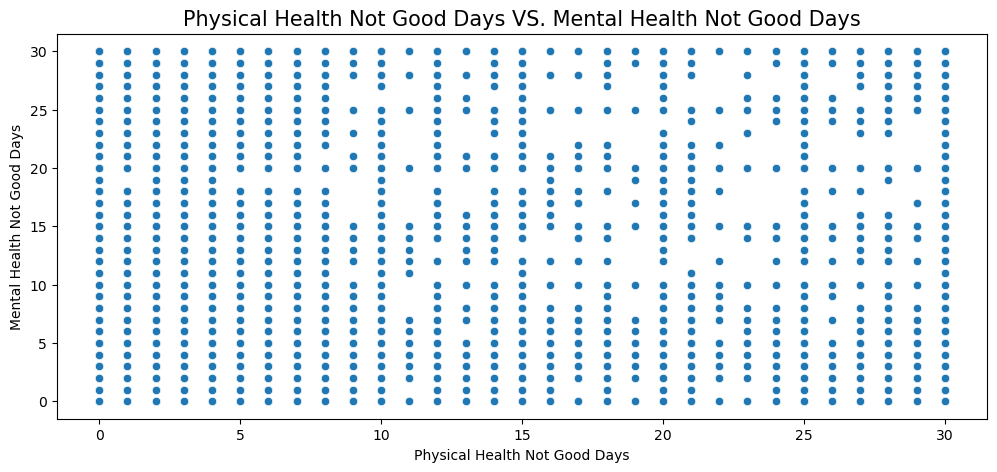

In [29]:
plt.figure(figsize = (12, 5))
sns.scatterplot(x = 'physhlth', y = 'menthlth', data = df_ran)
plt.title('Physical Health Not Good Days VS. Mental Health Not Good Days', size = 15)
plt.xlabel('Physical Health Not Good Days', size = 10)
plt.ylabel('Mental Health Not Good Days', size = 10);